# Assignment 3

## Task 1: Load Dataset and Data Preprocessing

In [2]:
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

2024-04-05 08:17:21.834028: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-05 08:17:24.981043: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-05 08:17:24.987564: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-05 08:17:33.980760: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# import test and train data from csv files
data_path = 'data/'

# import data
train_df = pd.read_csv(data_path + 'sign_mnist_train/sign_mnist_train.csv')
test_df = pd.read_csv(data_path + 'sign_mnist_test/sign_mnist_test.csv')

train_labels = train_df['label']
test_labels = test_df['label']

y_train = keras.utils.to_categorical(train_labels, 25)
y_test = keras.utils.to_categorical(test_labels, 25)

# drop the label column from the train and test data
train_df.drop('label', axis=1, inplace=True)
test_df.drop('label', axis=1, inplace=True)

#normalize the data
norm_train_df = train_df - np.mean(train_df, axis=0)
norm_train_df /= np.std(train_df, axis=0)


norm_test_df = test_df - np.mean(test_df, axis=0)
norm_test_df /= np.std(test_df, axis=0)

x_train = norm_train_df.values
x_test = norm_test_df.values

# print the first few rows of the train data
norm_train_df.describe()


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,2.745500e+04,2.745500e+04,2.745500e+04,2.745500e+04,2.745500e+04,2.745500e+04,2.745500e+04,2.745500e+04,2.745500e+04,2.745500e+04,...,2.745500e+04,2.745500e+04,2.745500e+04,2.745500e+04,2.745500e+04,2.745500e+04,2.745500e+04,2.745500e+04,2.745500e+04,2.745500e+04
mean,7.246475e-18,2.569911e-16,-1.591636e-16,3.442076e-16,-3.035755e-16,-1.361302e-16,3.977797e-16,2.158414e-16,-2.122182e-17,-3.337260e-16,...,-1.350950e-16,2.080773e-16,-1.211197e-16,1.599401e-16,-1.733978e-16,-1.154260e-16,-1.513996e-16,9.265136e-17,6.107743e-17,-1.863379e-17
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,...,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-3.516129e+00,-3.717951e+00,-3.872628e+00,-3.978452e+00,-4.209346e+00,-4.385096e+00,-4.582856e+00,-4.822727e+00,-5.021431e+00,-5.292222e+00,...,-2.213408e+00,-2.251439e+00,-2.379866e+00,-2.497755e+00,-2.541206e+00,-2.565091e+00,-2.565126e+00,-2.558810e+00,-2.533246e+00,-2.481917e+00
25%,-5.904418e-01,-5.633318e-01,-5.440379e-01,-5.323688e-01,-5.176674e-01,-5.096552e-01,-5.275384e-01,-5.448285e-01,-5.499002e-01,-5.605632e-01,...,-7.702720e-01,-7.860521e-01,-7.811384e-01,-7.397158e-01,-6.584740e-01,-5.948140e-01,-5.496332e-01,-5.366155e-01,-5.209603e-01,-5.330285e-01
50%,1.107560e-01,1.126581e-01,1.216801e-01,1.153912e-01,1.021035e-01,9.934265e-02,1.007502e-01,7.903171e-02,6.263822e-02,4.687944e-02,...,4.541390e-02,2.214015e-01,2.898539e-01,3.276650e-01,3.299605e-01,3.351568e-01,3.321447e-01,3.164979e-01,3.279727e-01,3.443596e-01
75%,6.910576e-01,6.885014e-01,6.849800e-01,6.595095e-01,6.679812e-01,6.529771e-01,6.433631e-01,6.434767e-01,6.445497e-01,6.543221e-01,...,8.610998e-01,8.319795e-01,8.020675e-01,7.514780e-01,7.221964e-01,6.976878e-01,6.943035e-01,6.956594e-01,6.738343e-01,6.859975e-01
max,2.649576e+00,2.666398e+00,2.656529e+00,2.628700e+00,2.662027e+00,2.673743e+00,2.699580e+00,2.752718e+00,2.788434e+00,2.860298e+00,...,1.786589e+00,1.640995e+00,1.578149e+00,1.504923e+00,1.459600e+00,1.454274e+00,1.450113e+00,1.469781e+00,1.475604e+00,1.477976e+00


## Task 2: Implement an MLP to classify image data

### Layer definition (from NumpyDeepMLP.ipynb)

In [4]:
class NeuralNetLayer:
    def __init__(self):
        self.gradient = None
        self.parameters = None
        
    def forward(self, x):
        raise NotImplementedError

    def backward(self, gradient):
        raise NotImplementedError

In [5]:
class LinearLayer(NeuralNetLayer):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.ni = input_size
        self.no = output_size
        self.w = np.random.randn(output_size, input_size)
        self.b = np.random.randn(output_size)
        self.cur_input = None
        self.parameters = [self.w, self.b]

    def forward(self, x):
        self.cur_input = x
        return (self.w[None, :, :] @ x[:, :, None]).squeeze() + self.b

    def backward(self, gradient):
        assert self.cur_input is not None, "Must call forward before backward"
        #dw = gradient.dot(self.cur_input)
        dw = gradient[:, :, None] @ self.cur_input[:, None, :]
        db = gradient
        self.gradient = [dw, db]
        return gradient.dot(self.w)

In [6]:
class ReLULayer(NeuralNetLayer):
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        self.gradient = np.where(x > 0, 1.0, 0.0)
        return np.maximum(0, x)

    def backward(self, gradient):
        assert self.gradient is not None, "Must call forward before backward"
        return gradient * self.gradient

In [7]:
class SoftmaxOutputLayer(NeuralNetLayer):
    def __init__(self):
        super().__init__()
        self.cur_probs = None

    def forward(self, x):
        exps = np.exp(x - np.max(x, axis=-1)[:, None])
        probs = exps / np.sum(exps, axis=-1)[:, None]
        self.cur_probs = probs
        #print sum of probs
        return probs

    def backward(self, target):
        assert self.cur_probs is not None, "Must call forward before backward"
        return self.cur_probs - target

In [8]:
class Optimizer:
    def __init__(self, net):
        self.net = net

    def step(self):
        for layer in self.net.layers[::-1]:
            if layer.parameters is not None:
                self.update(layer.parameters, layer.gradient)

    def update(self, params, gradient):
        raise NotImplementedError

class GradientDescentOptimizer(Optimizer):
    def __init__(self, net, lr: float):
        super().__init__(net)
        self.lr = lr

    def update(self, params, gradient):
        for (p, g) in zip(params, gradient):
            p -= self.lr * g.mean(axis=0)

### MLP class definition

In [15]:
class MLP:
    def __init__(self, number_of_layers, hidden_size, activation=ReLULayer, input_size=784, output_size=25):
        self.layers = []
        self.number_of_layers = number_of_layers
        self.activation = activation
        self.hidden_size = hidden_size
        
        if number_of_layers > 0:
            self.layers.append(LinearLayer(input_size, hidden_size))
            for i in range(number_of_layers):
                self.layers.append(ReLULayer())
                if i == number_of_layers - 1:
                    self.layers.append(LinearLayer(hidden_size, output_size))
                else:
                    self.layers.append(LinearLayer(hidden_size, hidden_size))
            self.layers.append(SoftmaxOutputLayer())
        else:
            self.layers.append(LinearLayer(input_size, output_size))
            self.layers.append(SoftmaxOutputLayer())

    def forward(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def backward(self, target):
        for layer in self.layers[::-1]:
            target = layer.backward(target)

    def fit(self, x, y, lr, iter, x_test=None, y_test=None, batch_size=64, verbose=False, epsilon=1e-6):
        optimizer = GradientDescentOptimizer(self, lr)
        data_size = x.shape[0]
        num_batches = np.ceil(data_size / batch_size).astype(int)
        
        # Shuffle the dataset
        indices = np.arange(data_size)
        np.random.shuffle(indices)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        losses = []
        train_acc = []
        test_acc = []
        
        for i in range(iter):
            #print(f"Iteration {i}")
            loss_sum = 0
            train_acc_sum = 0
            test_acc_sum = 0
            for batch_num in range(num_batches):
                start_idx = batch_num * batch_size
                end_idx = min((batch_num + 1) * batch_size, data_size)
                
                x_batch = x_shuffled[start_idx:end_idx]
                y_batch = y_shuffled[start_idx:end_idx]
                
                out = self.forward(x_batch)  
                loss_sum -= np.sum(y_batch * np.log(out + 1e-9))            
                #print(out)
                
                self.backward(y_batch)
                optimizer.step()
                
                # Optional: Print loss information here for each batch or after certain number of iterations
            if i % 5 == 0 and verbose:
                print(f"Iteration {i}, Loss: {loss_sum / num_batches}")  
            losses.append(loss_sum / num_batches)

            # Calculate accuracy
            train_acc.append(self.evaluate_acc(y, self.forward(x)))
            if x_test is not None and y_test is not None:
                test_acc.append(self.evaluate_acc(y_test, self.forward(x_test)))
            if loss_sum / num_batches < epsilon:
                break

        self.train_acc = train_acc
        self.test_acc = test_acc

        # plt.plot(losses, label=self.hidden_size)
        # plt.xlabel('Epoch')
        # plt.ylabel('Cross Entropy Loss')

        return losses


    def predict(self, x):
        return self.forward(x)
    
    def evaluate_acc(self, y, y_hat):
        return np.mean(np.argmax(y, axis=1) == np.argmax(y_hat, axis=1))

## Task 3: Experiments

### 1. Performance comparison w.r.t. number of hidden units and hidden layers

In [30]:
hidden_sizes = [32, 64, 128, 256]

#### (1) MPL with no hidden layer

Hidden size: 32
Iteration 0, Loss: 1203.728140368253
Iteration 5, Loss: 1061.3463658684402
Iteration 10, Loss: 919.790951104906
Iteration 15, Loss: 805.6189173030735
Iteration 20, Loss: 717.73529111322
Iteration 25, Loss: 644.1469110526806
Iteration 30, Loss: 583.5025323204445
Iteration 35, Loss: 532.5459803274524
Iteration 40, Loss: 488.6430814920128
Iteration 45, Loss: 450.0736163579111
Iteration 50, Loss: 415.86547507053
Iteration 55, Loss: 385.60422344412143
Iteration 60, Loss: 358.87714161181407
Iteration 65, Loss: 334.9293866054646
Iteration 70, Loss: 313.13373920262967
Iteration 75, Loss: 293.28478203261807
Iteration 80, Loss: 275.3344242860866
Iteration 85, Loss: 259.09720228332793
Iteration 90, Loss: 244.31145383651864
Iteration 95, Loss: 230.74709630599096
Hidden size: 64
Iteration 0, Loss: 1163.3335067431844
Iteration 5, Loss: 997.7986946946701
Iteration 10, Loss: 876.5226329681482
Iteration 15, Loss: 777.5029936844165
Iteration 20, Loss: 695.6014063715564
Iteration 25, Loss

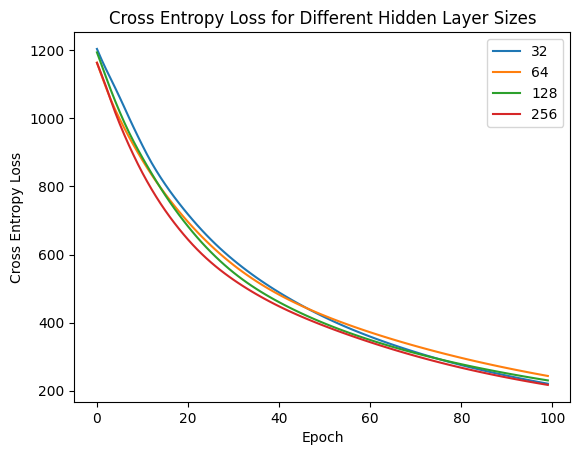

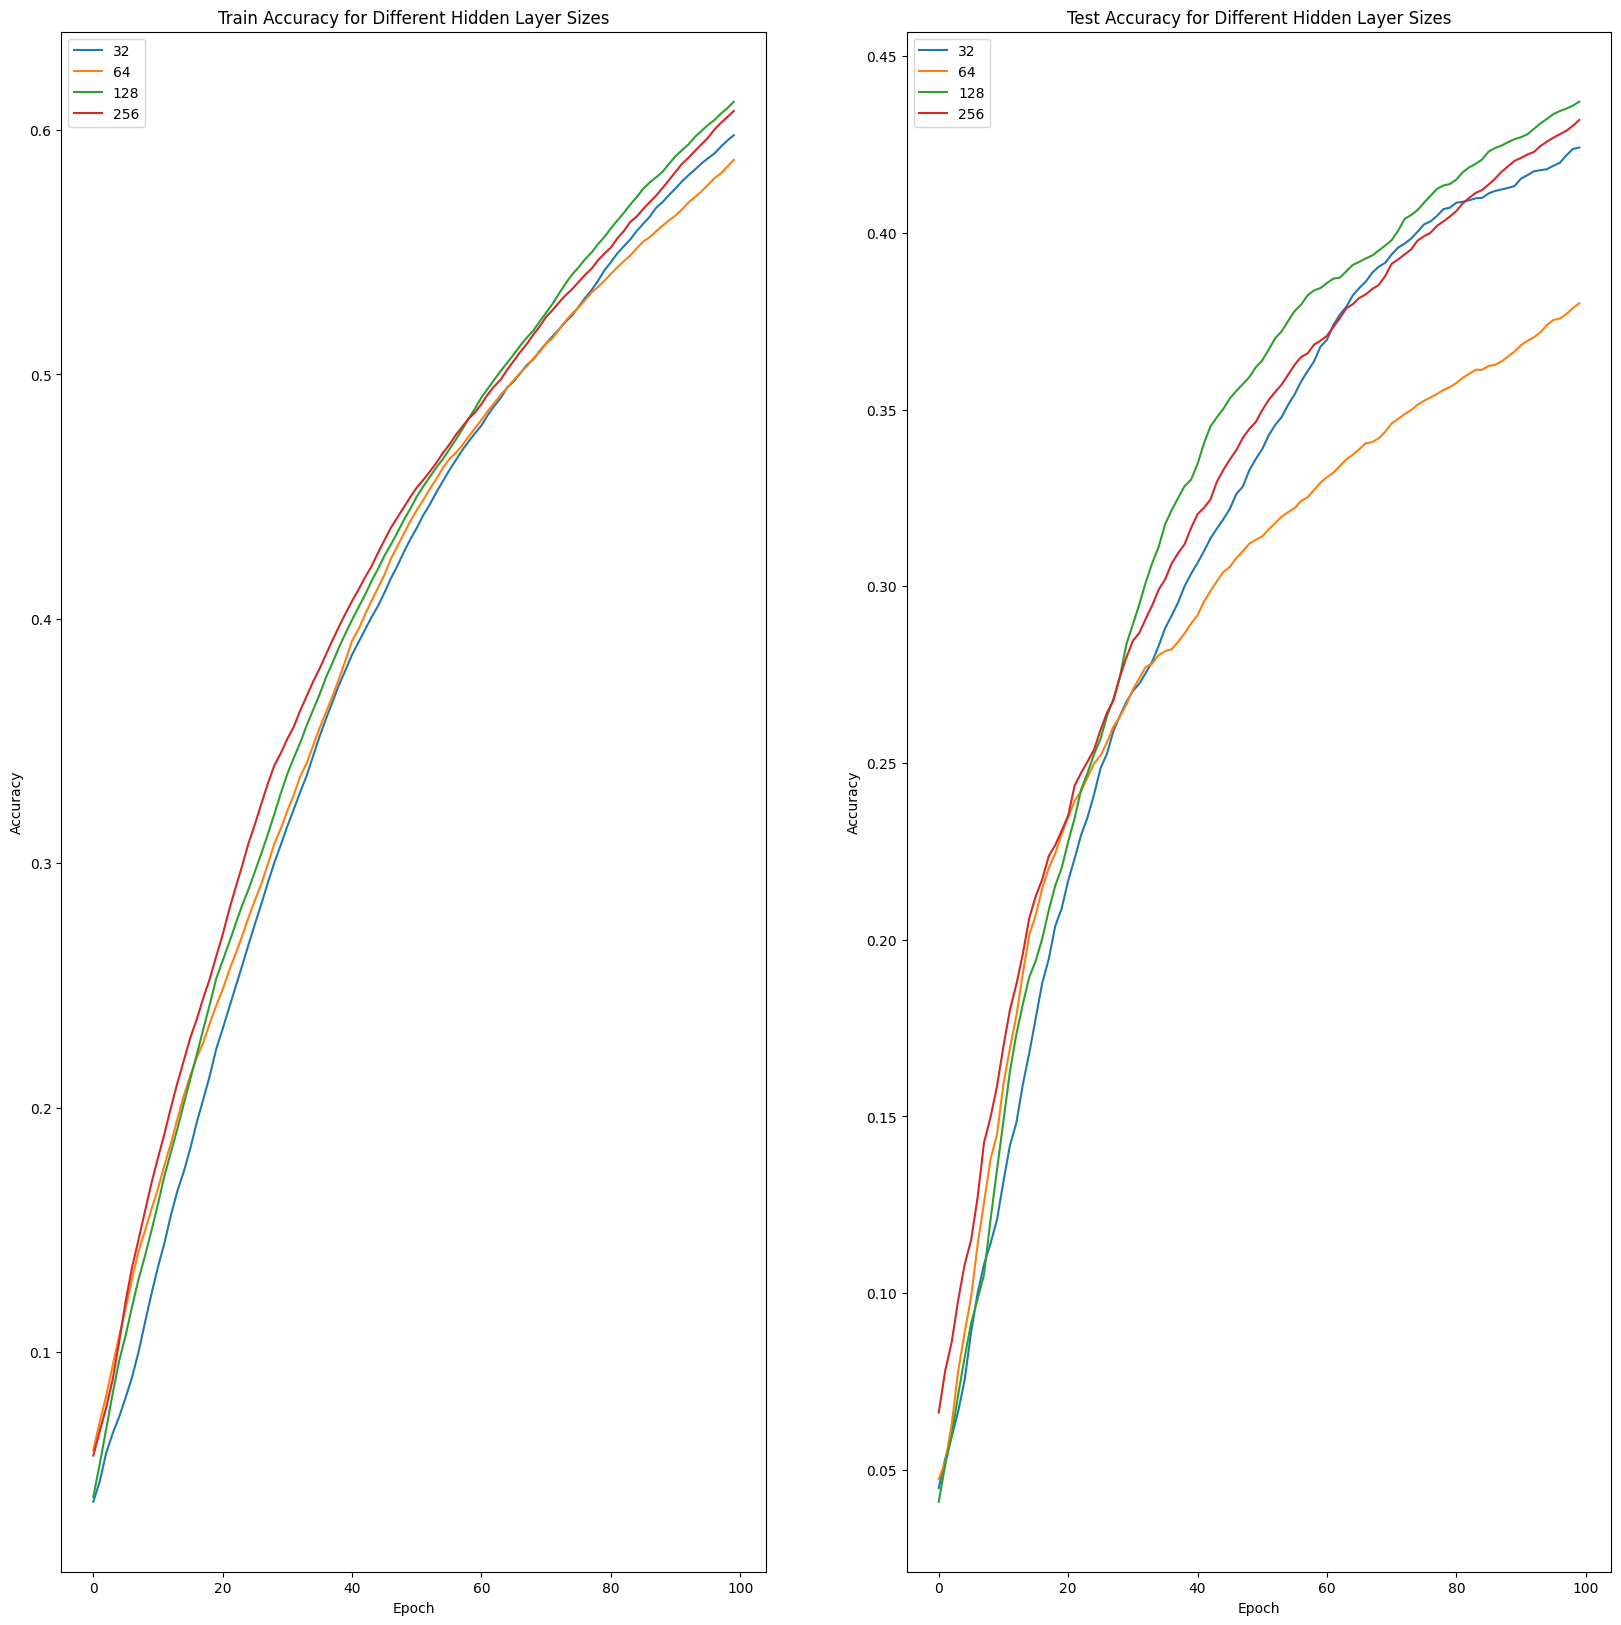

In [31]:
test_accs = []
train_accs = []

for size in hidden_sizes:
    print(f"Hidden size: {size}")
    mlp = MLP(0, size)
    losses = mlp.fit(x_train, y_train, 0.001, 100, x_test=x_test, y_test=y_test, verbose=True)
    plt.plot(losses, label=size)
    test_accs.append(mlp.test_acc)
    train_accs.append(mlp.train_acc)

plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.title('Cross Entropy Loss for Different Hidden Layer Sizes')
plt.legend()
plt.show()

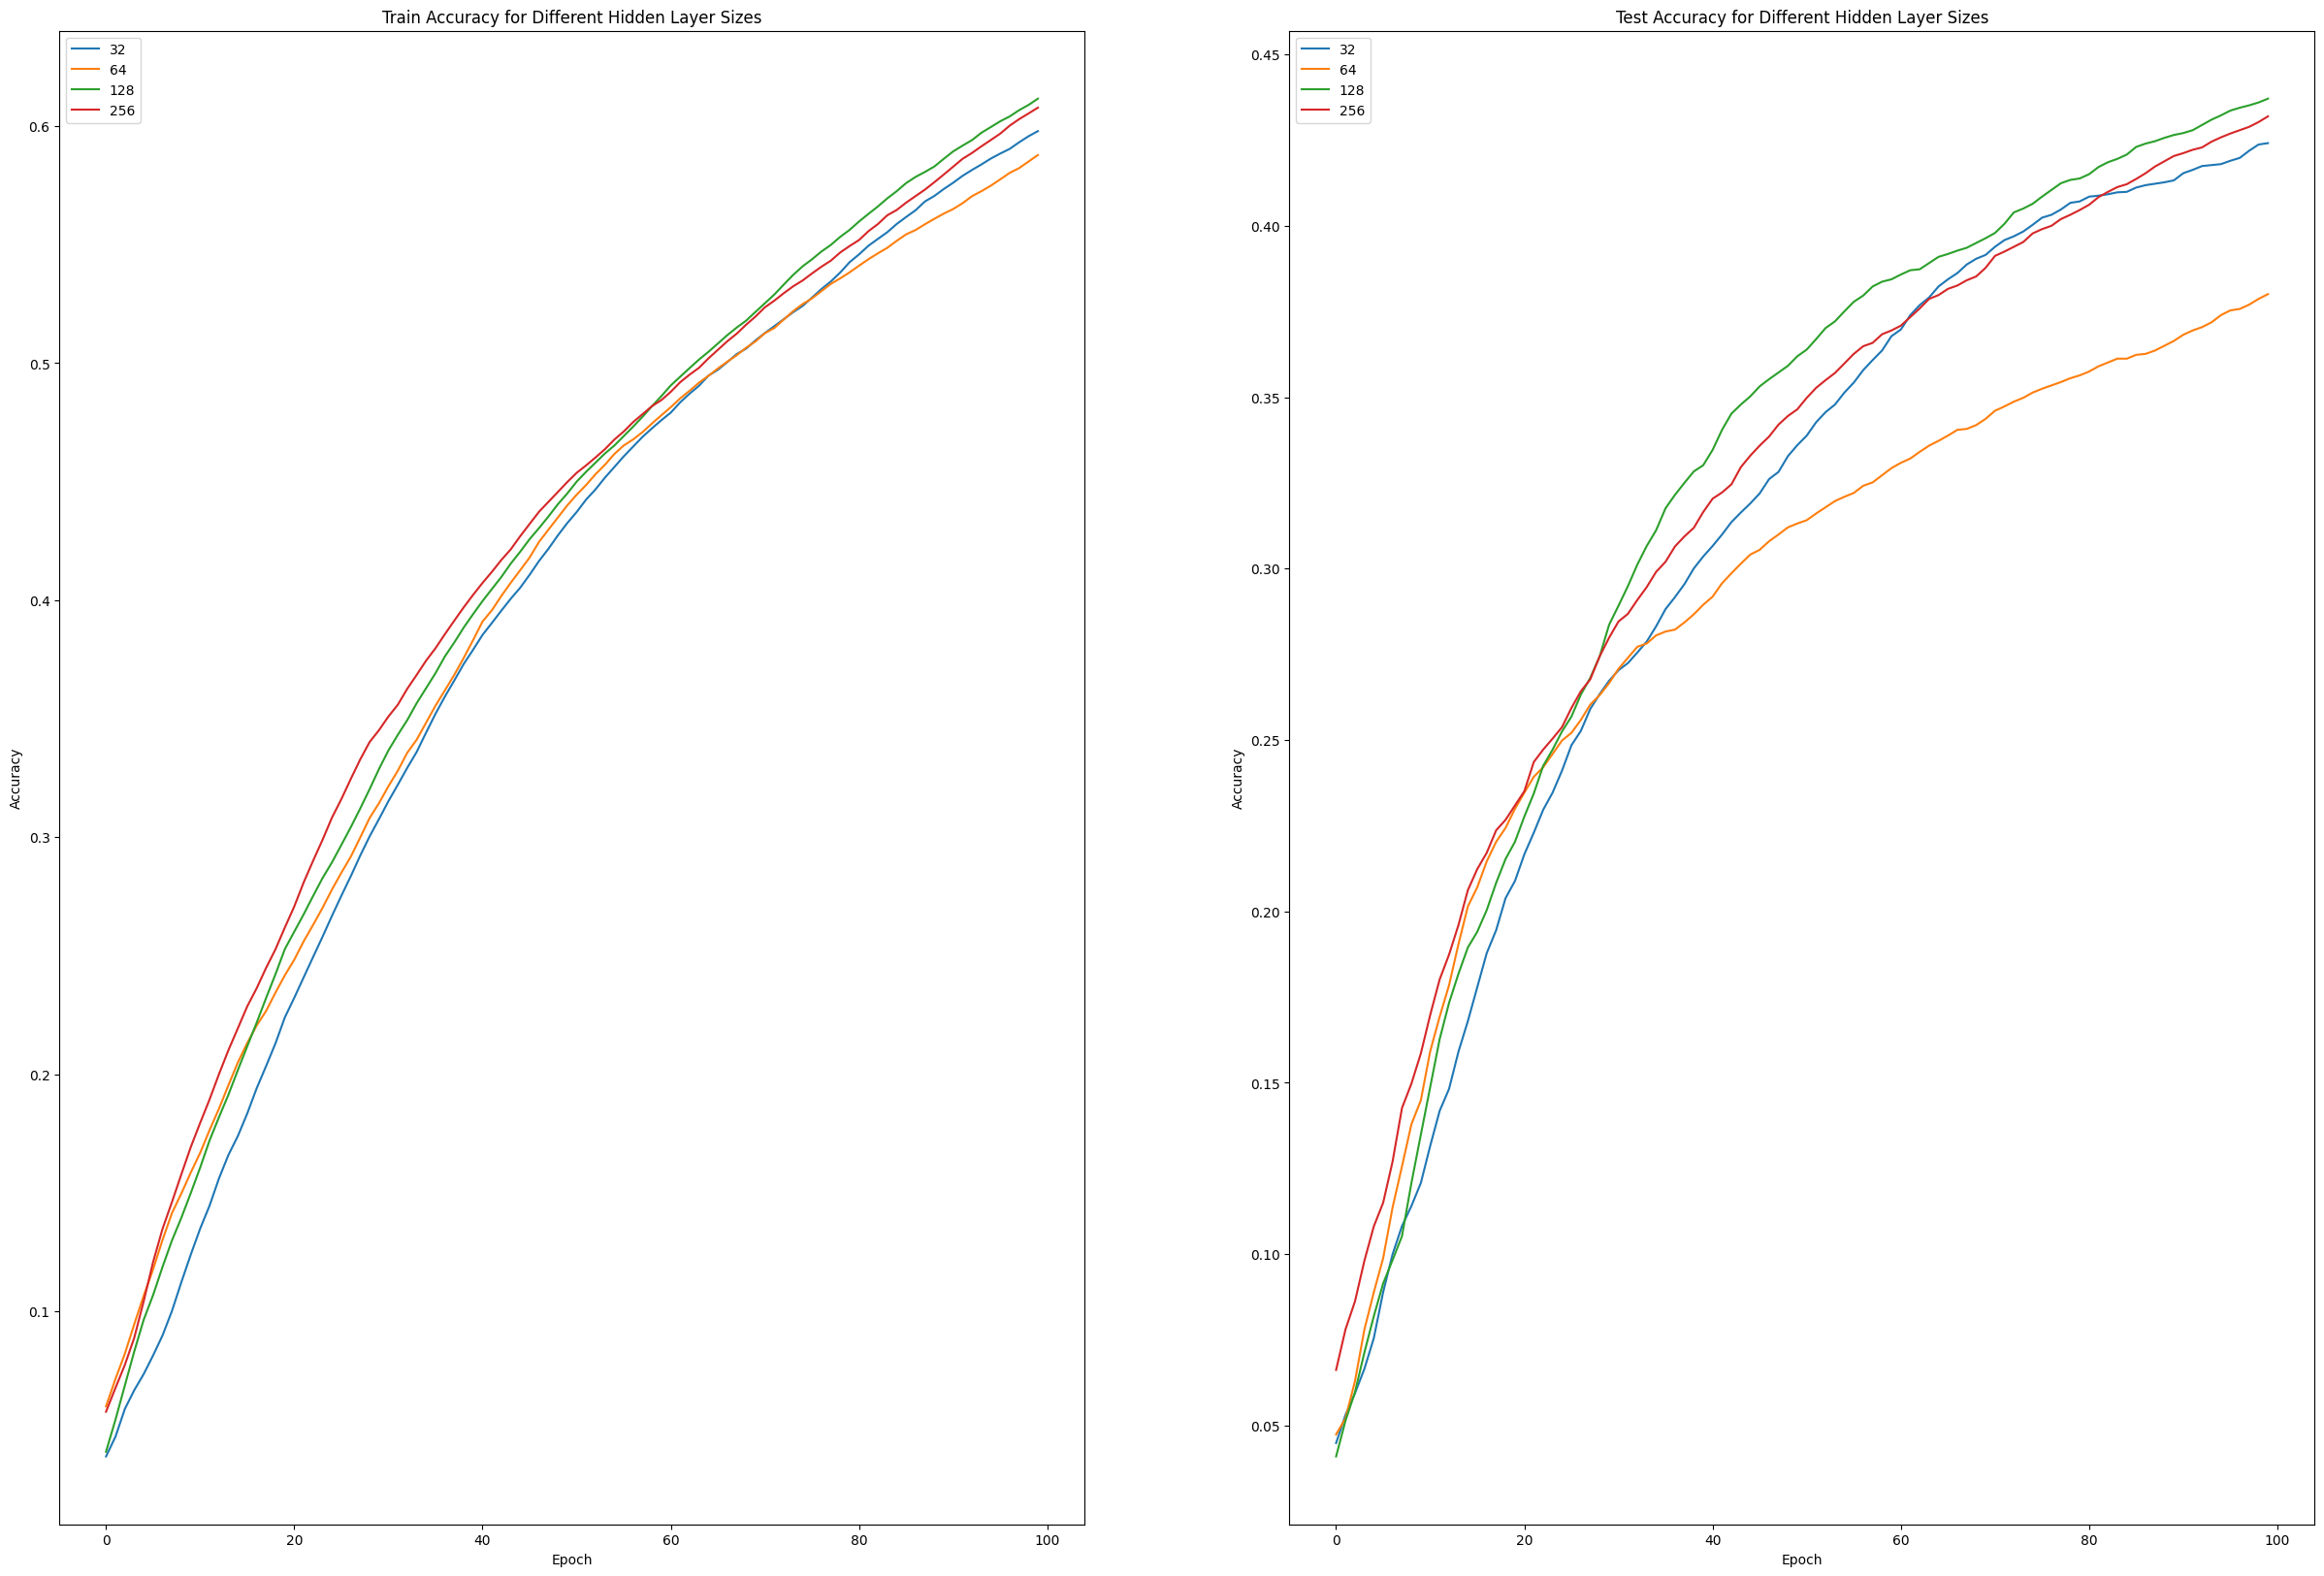

In [32]:
plt.figure(figsize=(30,20))
plt.subplot(121)
for accuracies in train_accs:
    plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train Accuracy for Different Hidden Layer Sizes')
plt.legend(hidden_sizes)
plt.subplot(122)
for accuracies in test_accs:
    plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy for Different Hidden Layer Sizes')
plt.legend(hidden_sizes)
plt.show()

#### (2) MLP with a single hidden ReLU activation layer

Hidden size: 32
Iteration 0, Loss: 1218.1459545171383
Iteration 5, Loss: 778.5768538407712
Iteration 10, Loss: 545.7096776567068
Iteration 15, Loss: 397.6799316313461
Iteration 20, Loss: 296.4445399667431
Iteration 25, Loss: 231.4613313744527
Iteration 30, Loss: 186.10788556896017
Iteration 35, Loss: 153.3717308249875
Iteration 40, Loss: 128.1912877608675
Iteration 45, Loss: 107.94885393033236
Iteration 50, Loss: 90.71399066907071
Iteration 55, Loss: 76.7288405757254
Iteration 60, Loss: 65.89258907987451
Iteration 65, Loss: 57.28703724476785
Iteration 70, Loss: 50.36828999220084
Iteration 75, Loss: 44.83687179516746
Iteration 80, Loss: 40.37994713030285
Iteration 85, Loss: 36.68286820930471
Iteration 90, Loss: 33.49942465444084
Iteration 95, Loss: 30.68976719886017
Hidden size: 64
Iteration 0, Loss: 1204.3989199169084
Iteration 5, Loss: 700.2604884748098
Iteration 10, Loss: 455.3143312517583
Iteration 15, Loss: 313.0681925908766
Iteration 20, Loss: 223.31127430319805
Iteration 25, Loss

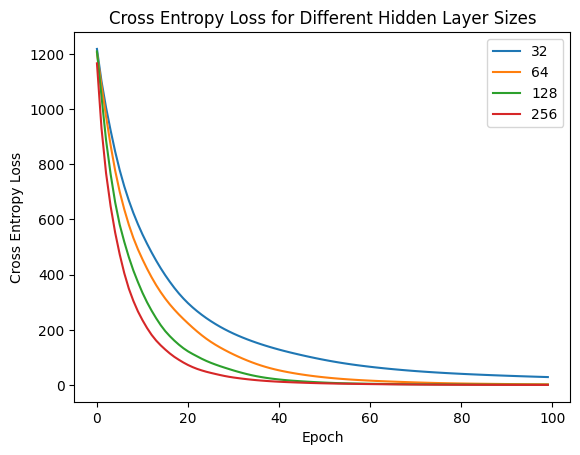

In [34]:
test_accs_1 = []
train_accs_1 = []

for size in hidden_sizes:
    print(f"Hidden size: {size}")
    mlp = MLP(1, size)
    losses = mlp.fit(x_train, y_train, 0.001, 100, x_test=x_test, y_test=y_test, verbose=True)
    plt.plot(losses, label=size)
    test_accs_1.append(mlp.test_acc)
    train_accs_1.append(mlp.train_acc)

plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.title('Cross Entropy Loss for Different Hidden Layer Sizes')
plt.legend()
plt.show()

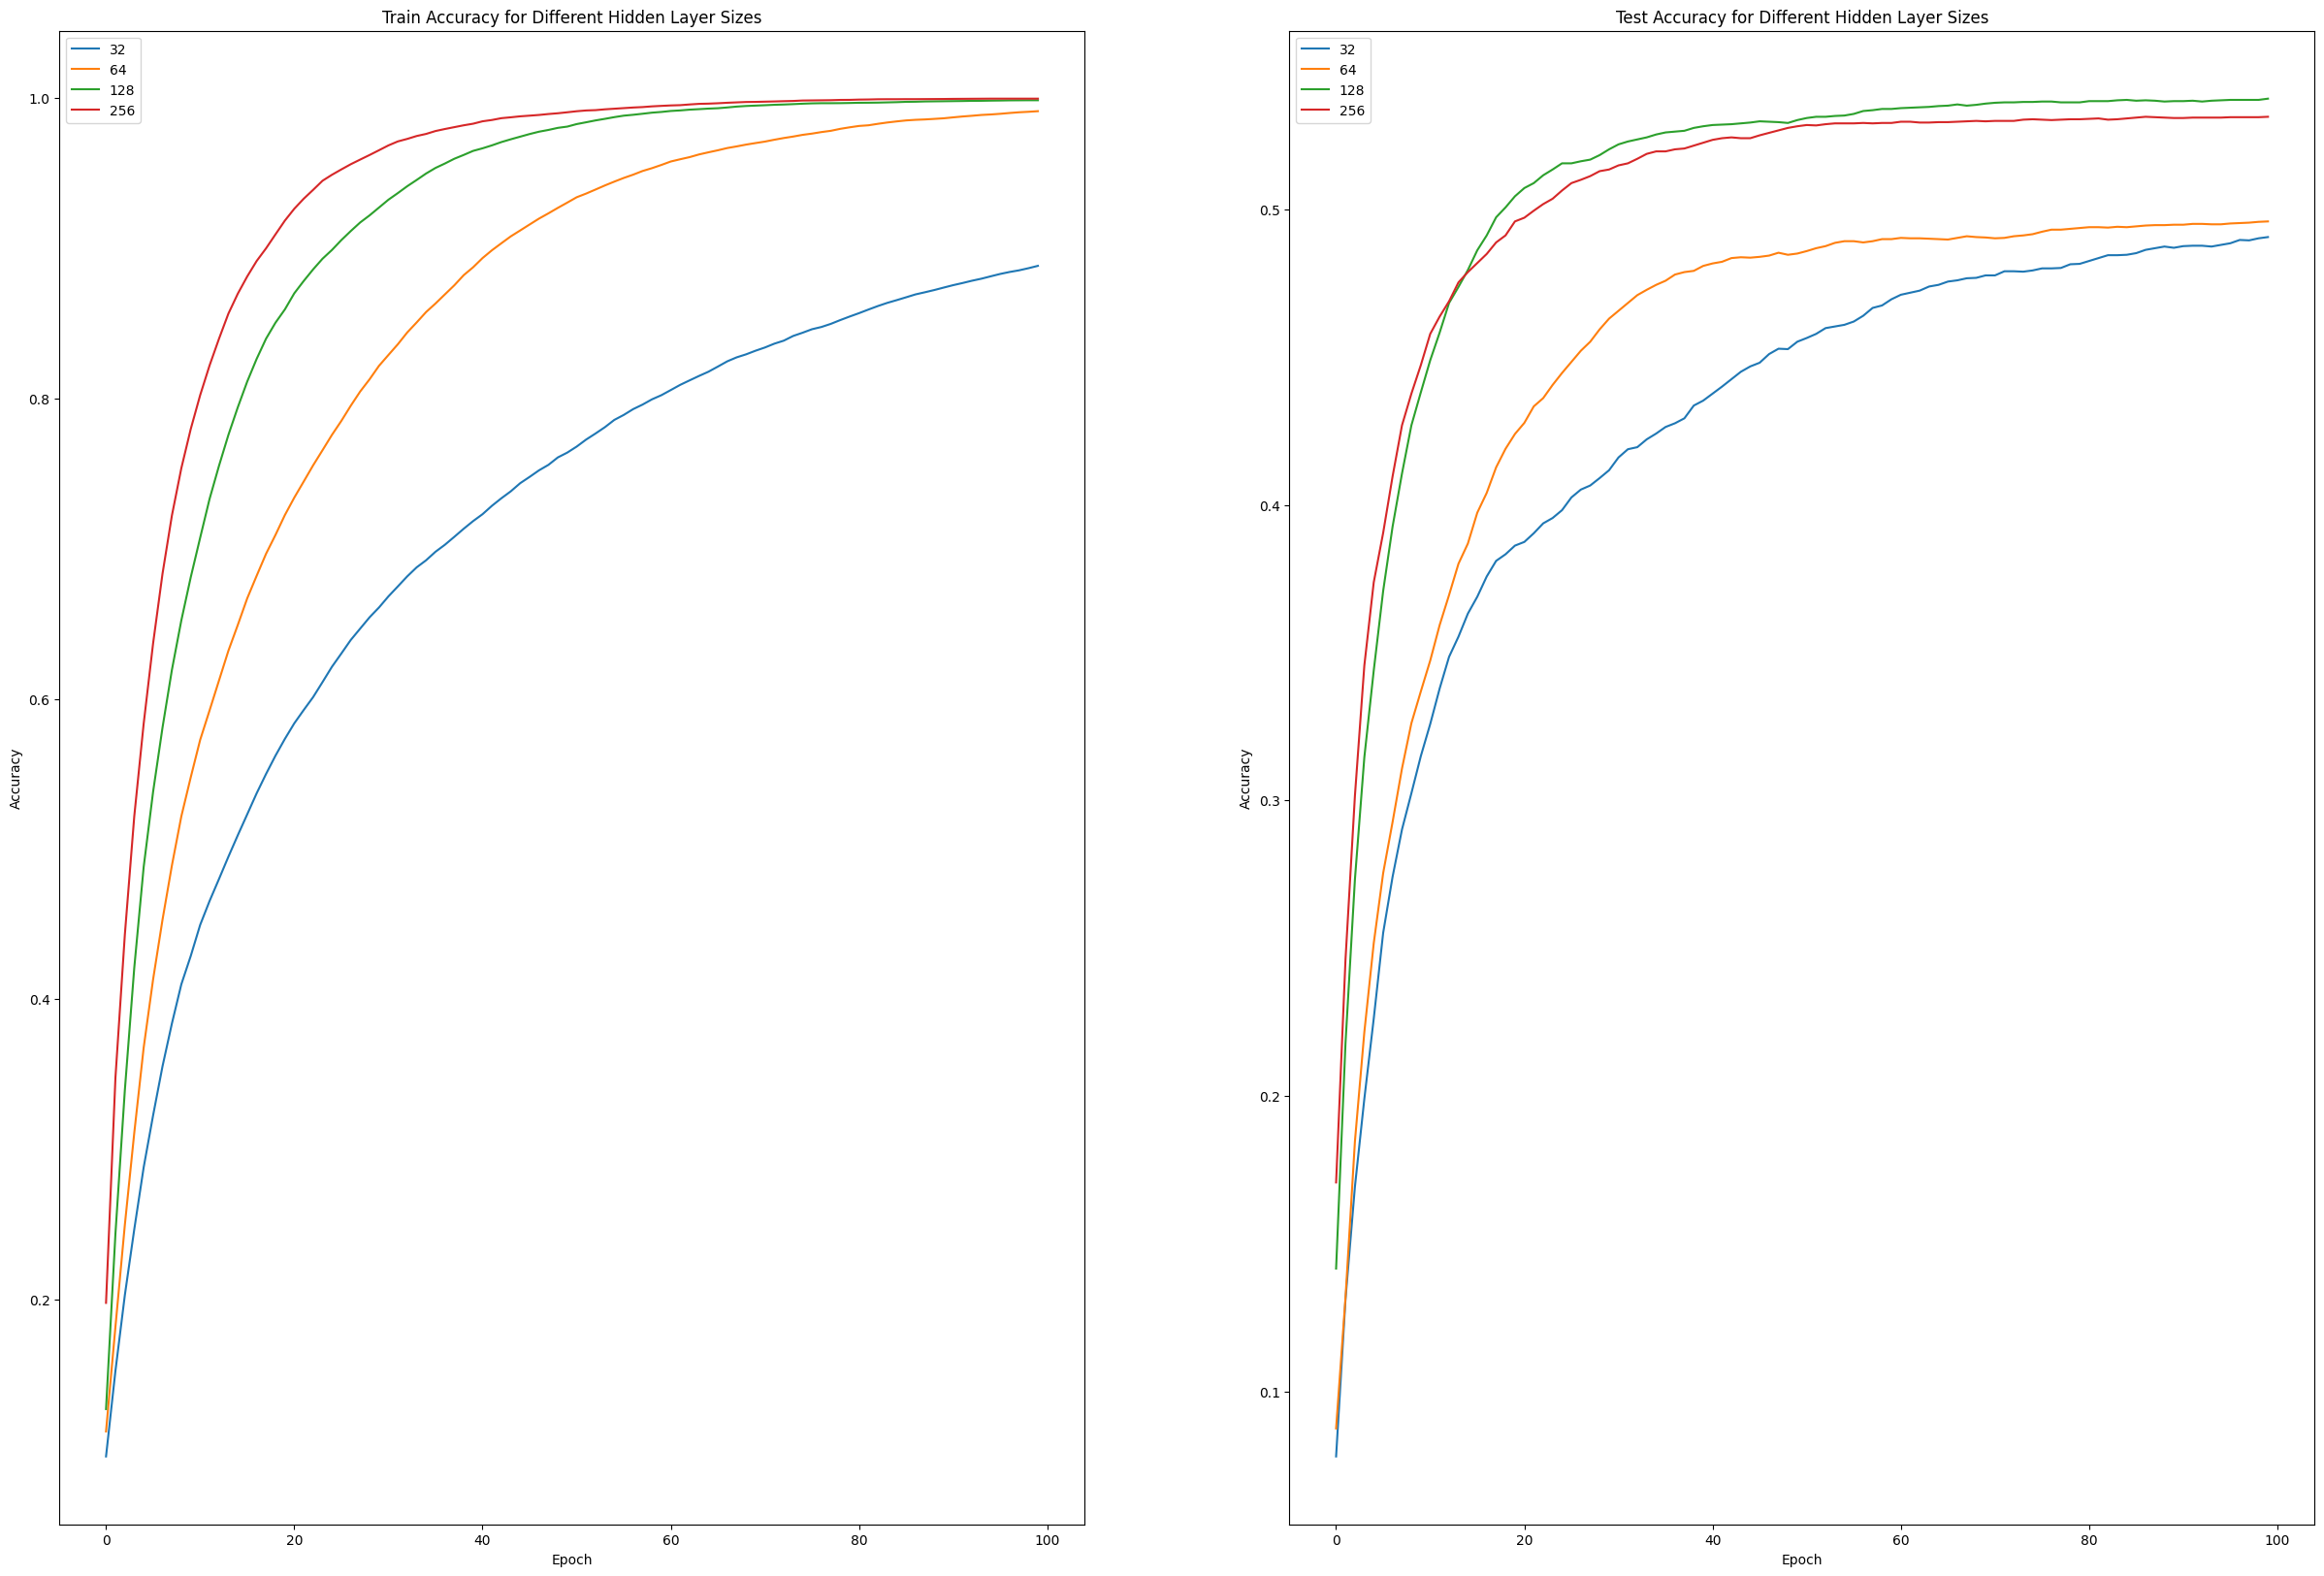

In [35]:
plt.figure(figsize=(30,20))
plt.subplot(121)
for accuracies in train_accs_1:
    plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train Accuracy for Different Hidden Layer Sizes')
plt.legend(hidden_sizes)
plt.subplot(122)
for accuracies in test_accs_1:
    plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy for Different Hidden Layer Sizes')
plt.legend(hidden_sizes)
plt.show()

#### (3) MLP with 2 hidden ReLU activation layers

Hidden size: 32
Iteration 0, Loss: 1130.1884801623694
Iteration 5, Loss: 264.12821953647546
Iteration 10, Loss: 223.1677512385933
Iteration 15, Loss: 210.11340701271786
Iteration 20, Loss: 202.90887928096203
Hidden size: 64
Iteration 0, Loss: 1014.8585678252877
Iteration 5, Loss: 323.1610360303379
Iteration 10, Loss: 135.8199154830337
Iteration 15, Loss: 61.27543957906045
Iteration 20, Loss: 31.672907138887833
Hidden size: 128
Iteration 0, Loss: 815.3867911371075
Iteration 5, Loss: 37.56448694828761
Iteration 10, Loss: 4.520215407533111
Iteration 15, Loss: 1.2620718106909066
Iteration 20, Loss: 0.5173087964436587
Hidden size: 256
Iteration 0, Loss: 543.7533695085515
Iteration 5, Loss: 4.81632204493044
Iteration 10, Loss: 0.9890862203235372
Iteration 15, Loss: -6.359706986976798e-08
Iteration 20, Loss: -6.359720917690171e-08


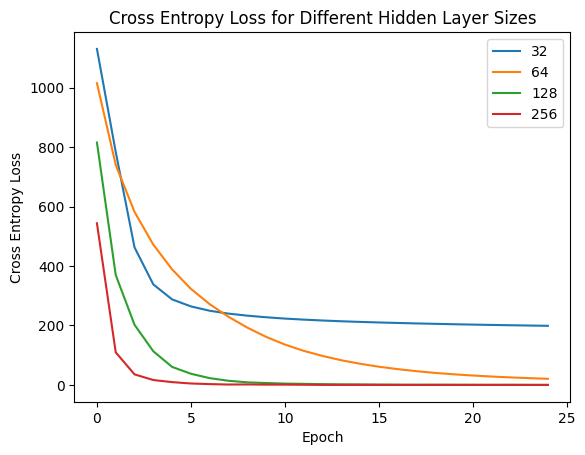

In [37]:
test_accs_2 = []
train_accs_2 = []

for size in hidden_sizes:
    print(f"Hidden size: {size}")
    mlp = MLP(2, size)
    losses = mlp.fit(x_train, y_train, 0.001, 25, x_test=x_test, y_test=y_test, verbose=True)
    plt.plot(losses, label=size)
    test_accs_2.append(mlp.test_acc)
    train_accs_2.append(mlp.train_acc)

plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.title('Cross Entropy Loss for Different Hidden Layer Sizes')
plt.legend()
plt.show()

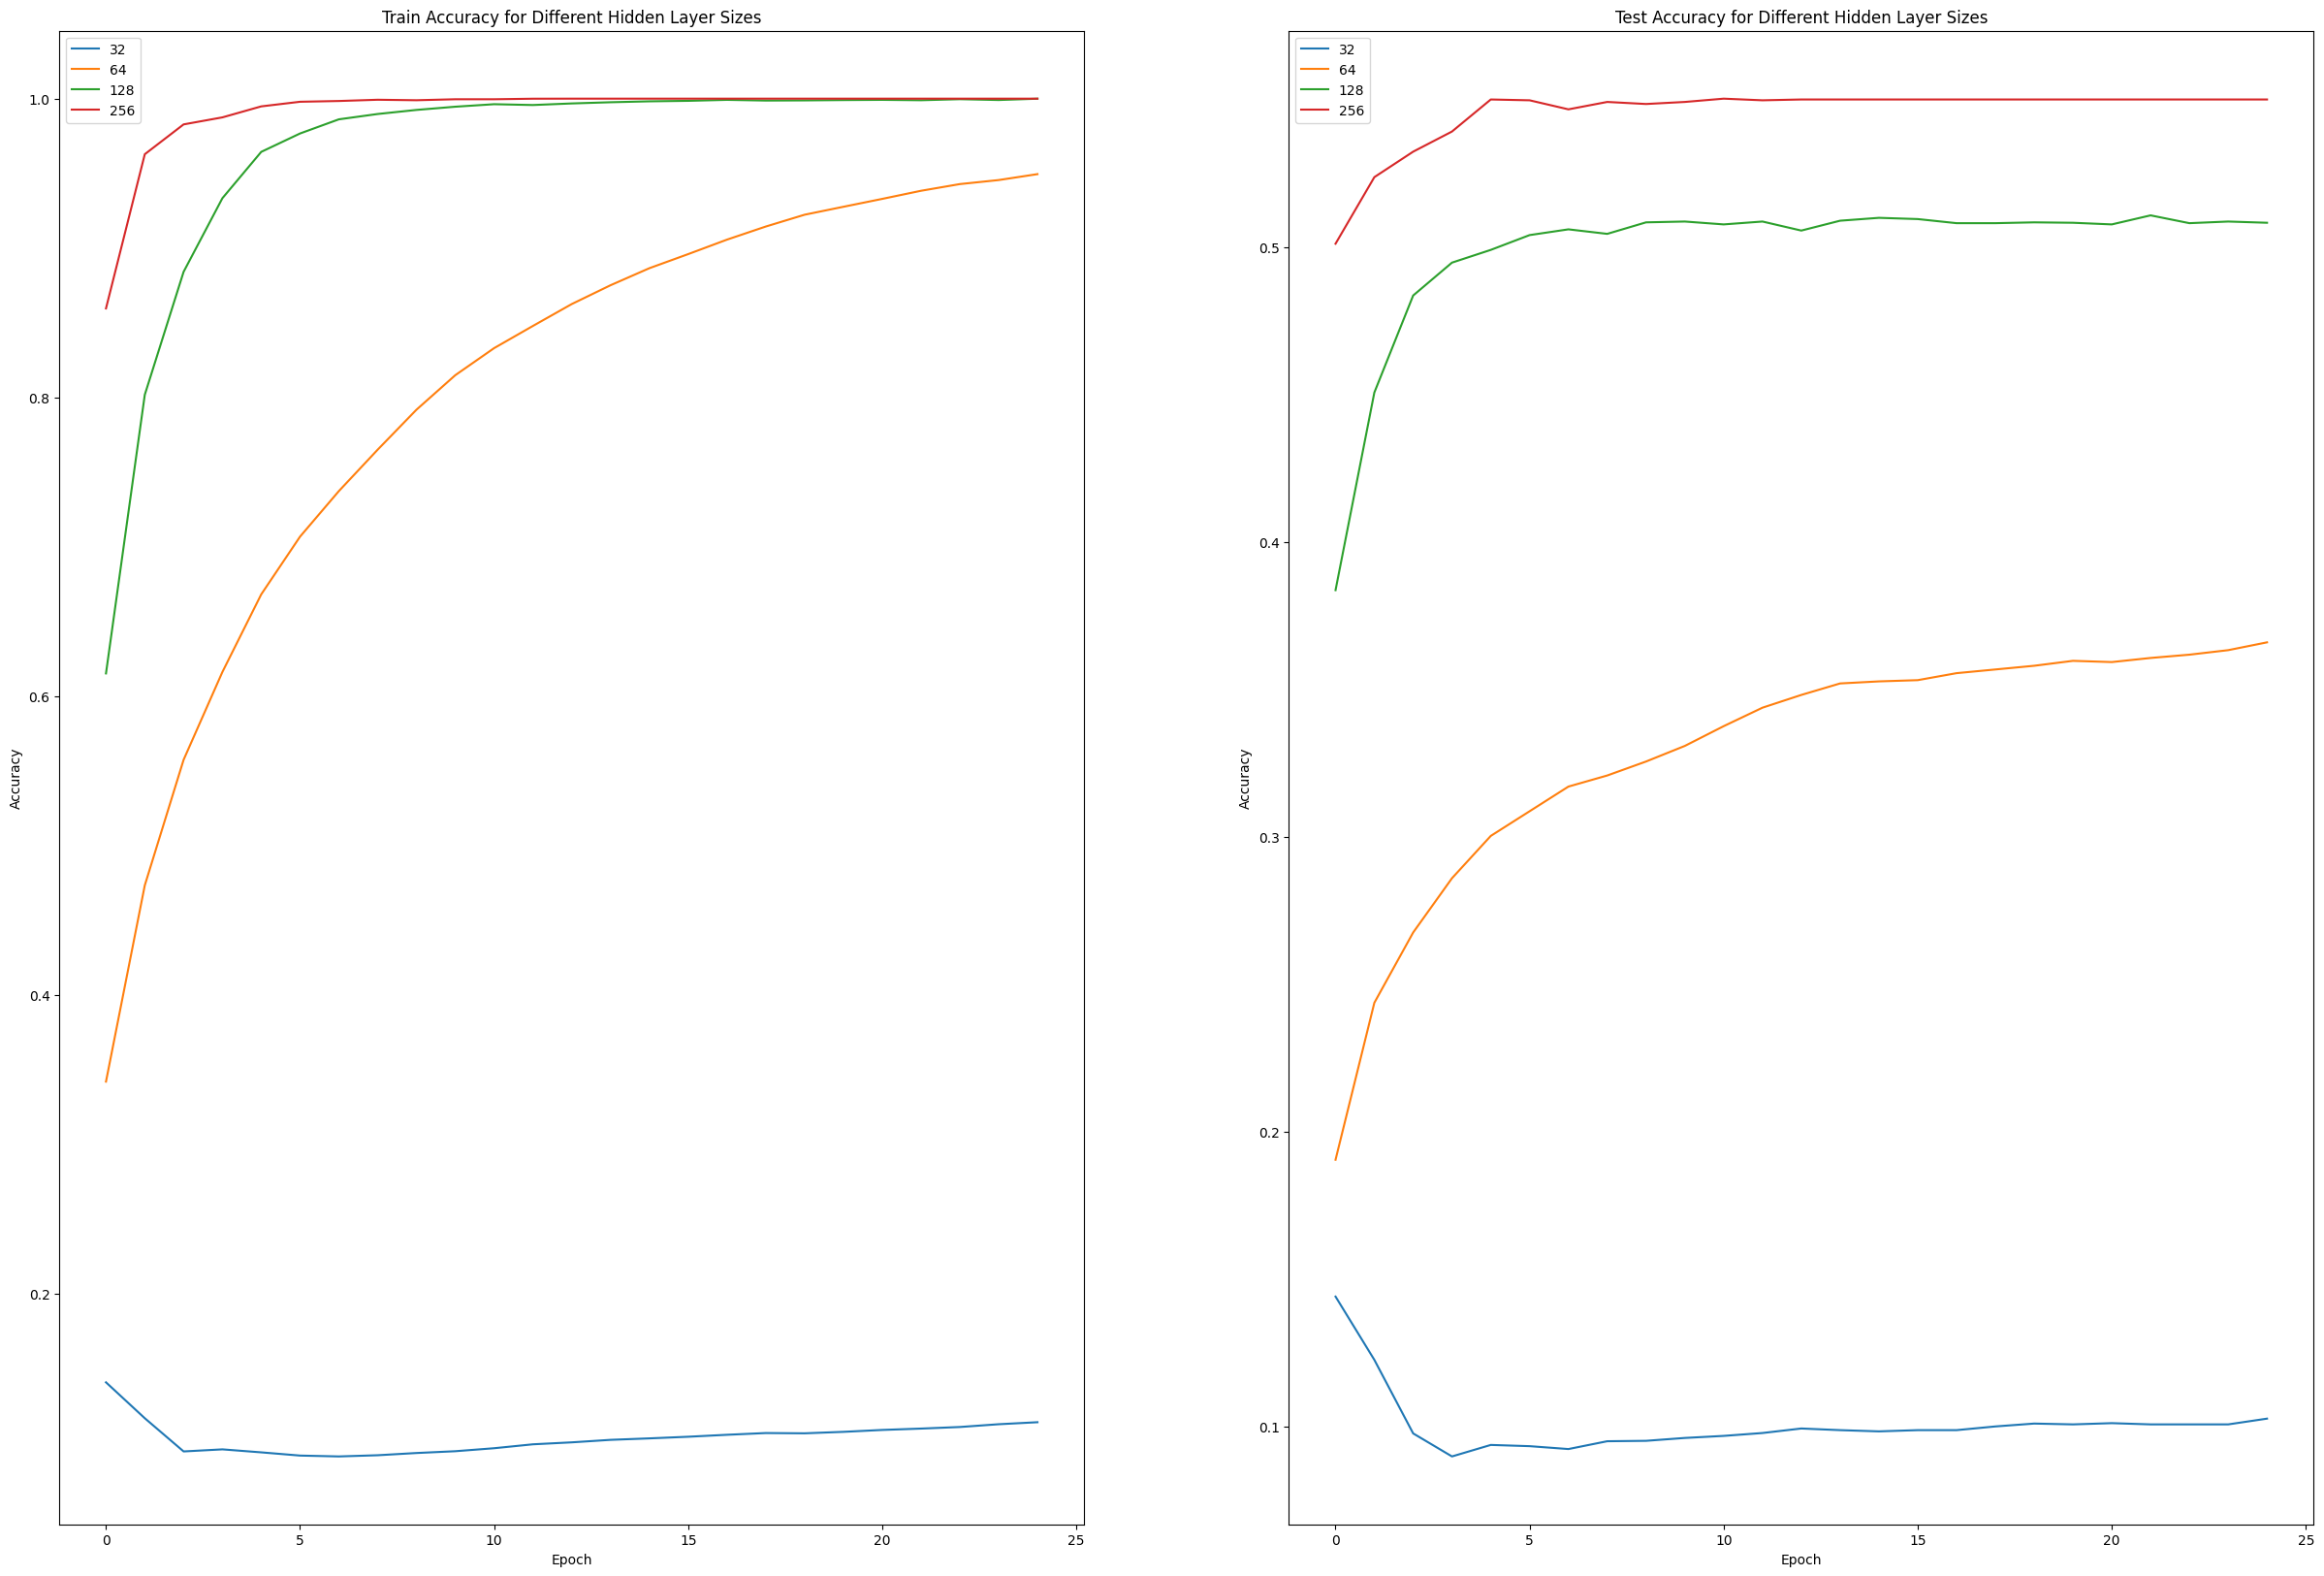

In [38]:
plt.figure(figsize=(30,20))
plt.subplot(121)
for accuracies in train_accs_2:
    plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train Accuracy for Different Hidden Layer Sizes')
plt.legend(hidden_sizes)
plt.subplot(122)
for accuracies in test_accs_2:
    plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy for Different Hidden Layer Sizes')
plt.legend(hidden_sizes)
plt.show()

### 2. Performance comparison between activation functions

### 4. CNN

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D

2024-04-01 14:33:35.540508: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-01 14:33:40.653980: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-01 14:33:40.668885: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-01 14:33:49.203734: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def create_cnn(hidden_units, k_size):
    model = Sequential()
    model.add(Conv2D(hidden_units, kernel_size=(k_size, k_size), activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(hidden_units, (k_size, k_size), activation='relu'))
    model.add(Conv2D(hidden_units, (k_size, k_size), activation='relu'))
    model.add(Flatten())
    model.add(Dense(hidden_units, activation='relu'))
    model.add(Dense(25, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
# Reshape the data
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

hidden_units = [32, 64, 128, 256]

In [8]:
model = create_cnn(32, 5)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 conv2d_4 (Conv2D)           (None, 20, 20, 32)        25632     
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        25632     
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                262176    
                                                                 
 dense_3 (Dense)             (None, 25)                825       
                                                                 
Total params: 315097 (1.20 MB)
Trainable params: 31509

In [9]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
429/429 [==============================] - 24s 54ms/step - loss: 0.4303 - accuracy: 0.8736 - val_loss: 0.8376 - val_accuracy: 0.8310
Epoch 2/10
429/429 [==============================] - 23s 53ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.8827 - val_accuracy: 0.8795
Epoch 3/10
429/429 [==============================] - 23s 54ms/step - loss: 9.3406e-05 - accuracy: 1.0000 - val_loss: 0.9599 - val_accuracy: 0.8784
Epoch 4/10
429/429 [==============================] - 23s 54ms/step - loss: 3.9302e-05 - accuracy: 1.0000 - val_loss: 1.0063 - val_accuracy: 0.8787
Epoch 5/10
429/429 [==============================] - 23s 54ms/step - loss: 2.3349e-05 - accuracy: 1.0000 - val_loss: 1.0503 - val_accuracy: 0.8779
Epoch 6/10
429/429 [==============================] - 23s 54ms/step - loss: 1.5644e-05 - accuracy: 1.0000 - val_loss: 1.0824 - val_accuracy: 0.8779
Epoch 7/10
429/429 [==============================] - 25s 57ms/step - loss: 1.0928e-05 - accuracy: 1.0000 - val_loss: 1.

In [11]:
(ls, acc) = model.evaluate(x_test, y_test)

225/225 [==============================] - 1s 4ms/step - loss: 1.1917 - accuracy: 0.8783


In [12]:
print('MODEL ACCURACY: {}%'.format(acc*100))

MODEL ACCURACY: 87.82766461372375%


#### Test with different number of units

In [13]:
accs = []

for size in hidden_units:
    model = create_cnn(size, 5)
    model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))
    (ls, acc) = model.evaluate(x_test, y_test)
    accs.append(acc)



Epoch 1/10
429/429 [==============================] - 25s 56ms/step - loss: 0.4341 - accuracy: 0.8726 - val_loss: 0.6329 - val_accuracy: 0.8772
Epoch 2/10
429/429 [==============================] - 25s 59ms/step - loss: 5.0689e-04 - accuracy: 1.0000 - val_loss: 0.6971 - val_accuracy: 0.8826
Epoch 3/10
429/429 [==============================] - 24s 57ms/step - loss: 9.4262e-05 - accuracy: 1.0000 - val_loss: 0.7459 - val_accuracy: 0.8839
Epoch 4/10
429/429 [==============================] - 27s 62ms/step - loss: 4.9643e-05 - accuracy: 1.0000 - val_loss: 0.7757 - val_accuracy: 0.8848
Epoch 5/10
429/429 [==============================] - 27s 62ms/step - loss: 3.0620e-05 - accuracy: 1.0000 - val_loss: 0.8096 - val_accuracy: 0.8841
Epoch 6/10
429/429 [==============================] - 24s 56ms/step - loss: 2.0373e-05 - accuracy: 1.0000 - val_loss: 0.8361 - val_accuracy: 0.8850
Epoch 7/10
429/429 [==============================] - 24s 55ms/step - loss: 1.4233e-05 - accuracy: 1.0000 - val_loss

In [15]:
for i, acc  in enumerate(accs):
    print('Hidden units: ' + str(hidden_units[i]) + ' MODEL ACCURACY: {}%'.format(acc*100))

Hidden units: 32 MODEL ACCURACY: 88.78973722457886%
Hidden units: 64 MODEL ACCURACY: 90.14222025871277%
Hidden units: 128 MODEL ACCURACY: 90.8951461315155%
Hidden units: 256 MODEL ACCURACY: 91.31343960762024%


### 5. Best MLP implementation

From experiment above, we see that the models with highest accuracies are 1-layer MLP with 128 and 256 hidden units, and 2-layer MLP with 256 hidden units. These will be used as candidates for further analysis below.

In [10]:
x_train = norm_train_df.values
x_test = norm_test_df.values

mlp1_128 = MLP(1, 128)
mlp1_256 = MLP(1, 256)
mlp2_256 = MLP(2, 256)

Learning rate comparison. Here, the number of epoch was chosen based on the experiments with different sizes above.

Learning rate: 0.1
Iteration 0, Loss: 183.01573320563077
Iteration 5, Loss: 0.4552157865559912
Iteration 10, Loss: 1.411615842430931e-05
Iteration 15, Loss: 6.612770304754235e-06
Iteration 20, Loss: 4.569114605716806e-06
Iteration 25, Loss: 3.547595164311021e-06
Iteration 30, Loss: 2.9214943817119407e-06
Iteration 35, Loss: 2.4944619958534923e-06
Iteration 40, Loss: 2.1816830155182094e-06
Iteration 45, Loss: 1.9420256847233333e-06
Iteration 50, Loss: 1.7522930376559618e-06
Iteration 55, Loss: 1.5976986232980355e-06
Iteration 60, Loss: 1.4691317590286007e-06
Iteration 65, Loss: 1.3604142003337348e-06
Iteration 70, Loss: 1.26719962684803e-06
Iteration 75, Loss: 1.1863367380171965e-06
Learning rate: 0.01
Iteration 0, Loss: 696.0100789238777
Iteration 5, Loss: 6.773104593894865
Iteration 10, Loss: 0.35225339231610403
Iteration 15, Loss: 0.08123884756836255
Iteration 20, Loss: 0.02751578617758969
Iteration 25, Loss: 0.01188562496117896
Iteration 30, Loss: 0.009054904367807383
Iteration 35, 

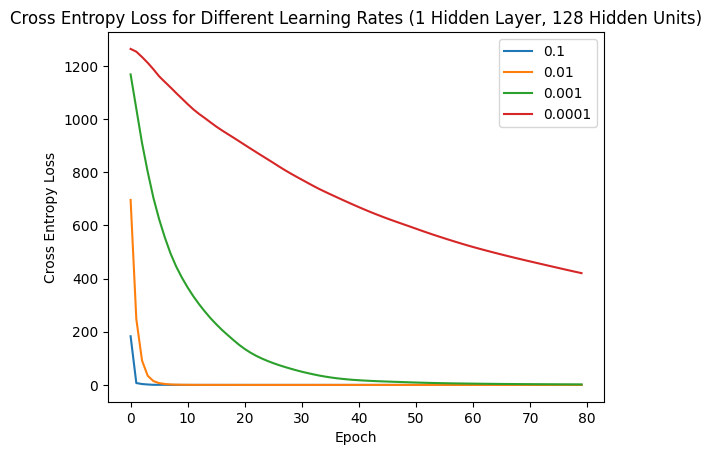

In [17]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]

test_accs_128 = []
train_accs_128 = []

for lr in learning_rates:
    print(f"Learning rate: {lr}")
    mlp1_128 = MLP(1, 128)
    losses = mlp1_128.fit(x_train, y_train, lr, 80, x_test=x_test, y_test=y_test, verbose=True)
    plt.plot(losses, label=lr)
    test_accs_128.append(mlp1_128.test_acc)
    train_accs_128.append(mlp1_128.train_acc)

plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.title('Cross Entropy Loss for Different Learning Rates (1 Hidden Layer, 128 Hidden Units)')
plt.legend()
plt.show()

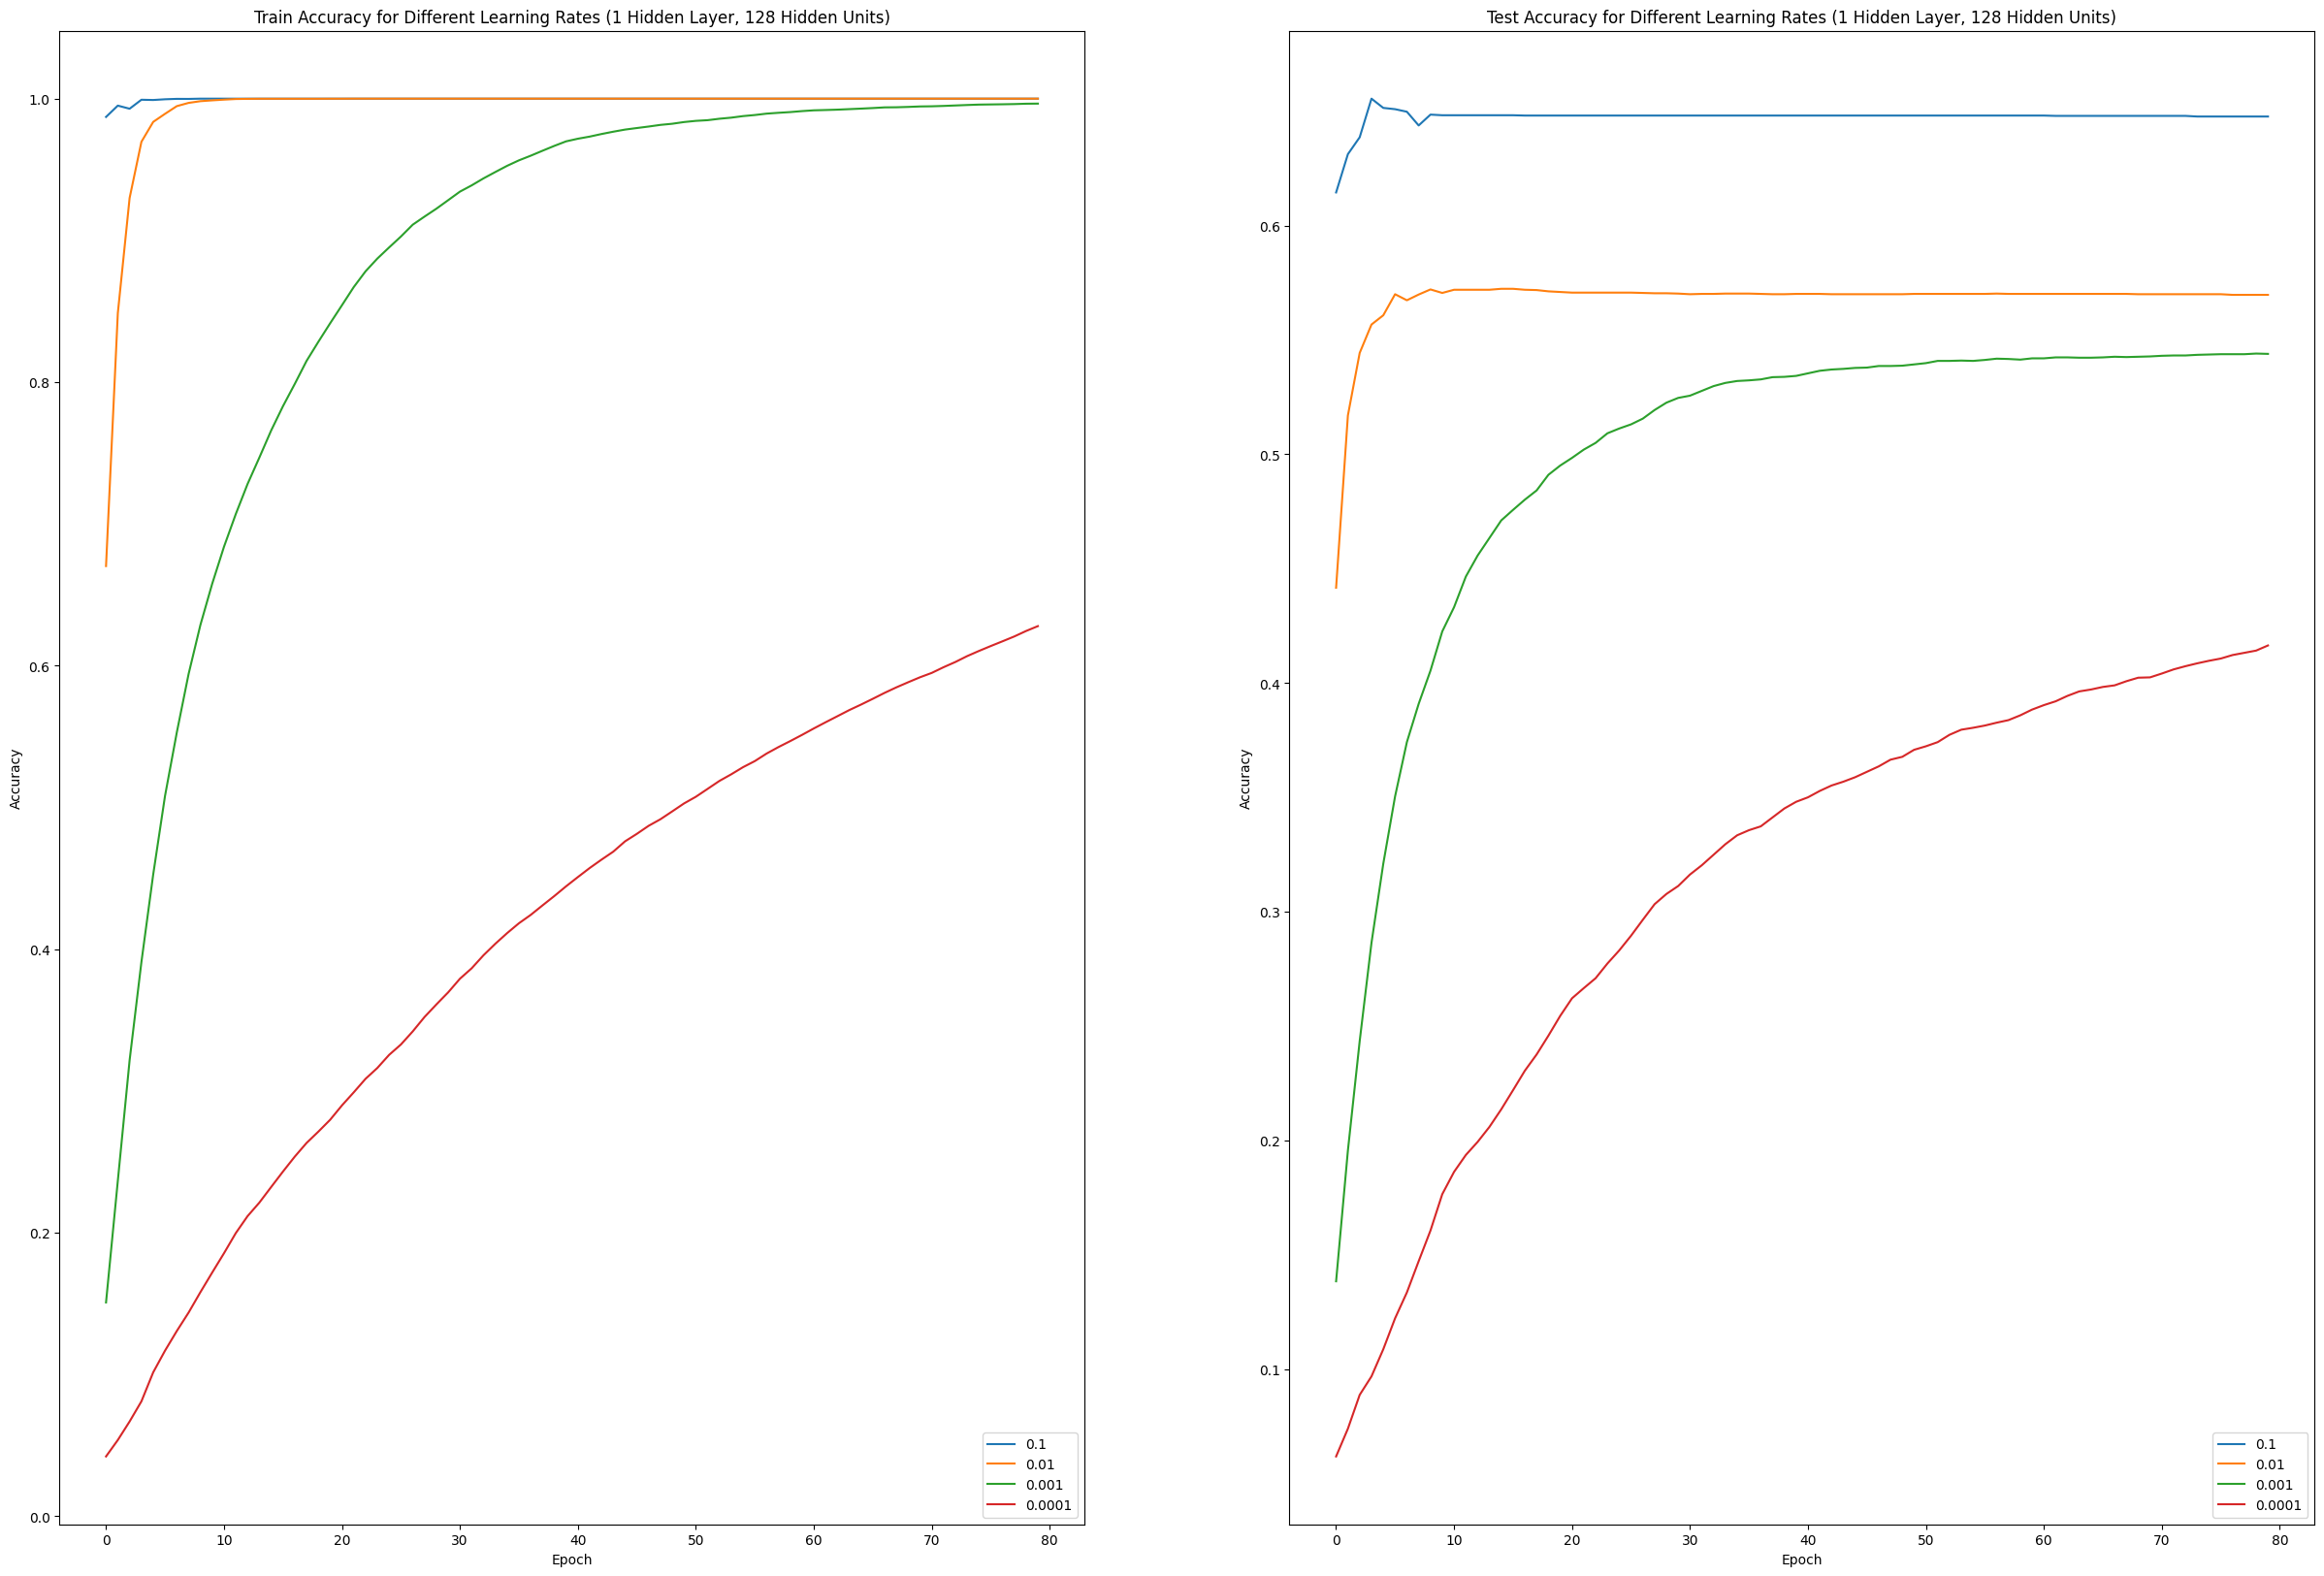

In [25]:
plt.figure(figsize=(30,20))
plt.subplot(121)
for accuracies in train_accs_128:
    plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train Accuracy for Different Learning Rates (1 Hidden Layer, 128 Hidden Units)')
plt.legend(learning_rates)
plt.subplot(122)
for accuracies in test_accs_128:
    plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy for Different Learning Rates (1 Hidden Layer, 128 Hidden Units)')
plt.legend(learning_rates)
plt.show()

Learning rate: 0.1
Iteration 0, Loss: 169.2463114648463
Iteration 5, Loss: 0.7574694621588648
Iteration 10, Loss: 0.30233668789651236
Iteration 15, Loss: 0.0009593147223677418
Learning rate: 0.01
Iteration 0, Loss: 610.1277459699821
Iteration 5, Loss: 4.7420138796824975
Iteration 10, Loss: 0.2789747603262524
Iteration 15, Loss: 0.0009575491763304379
Iteration 20, Loss: 0.0006352548640134901
Iteration 25, Loss: 0.0005076448683126787
Iteration 30, Loss: 0.00043276265416951673
Iteration 35, Loss: 0.00038207380616769626
Iteration 40, Loss: 0.00034491780856970124
Iteration 45, Loss: 0.0003162192437927421
Learning rate: 0.001
Iteration 0, Loss: 1163.0028089964405
Iteration 5, Loss: 461.93835656176276
Iteration 10, Loss: 227.62277161963488
Iteration 15, Loss: 119.28702271753288
Iteration 20, Loss: 62.817160797848615
Iteration 25, Loss: 35.36439117442446
Iteration 30, Loss: 21.568500287322273
Iteration 35, Loss: 12.91917231970743
Iteration 40, Loss: 8.15401586913314
Iteration 45, Loss: 5.24565

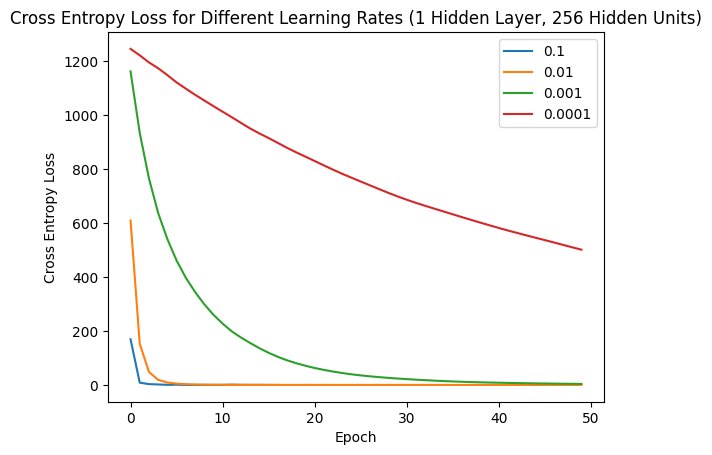

In [21]:
test_accs_1_256 = []
train_accs_1_256 = []

for lr in learning_rates:
    print(f"Learning rate: {lr}")
    mlp1_256 = MLP(1, 256)
    losses = mlp1_256.fit(x_train, y_train, lr, 50, x_test=x_test, y_test=y_test, verbose=True)
    plt.plot(losses, label=lr)
    test_accs_1_256.append(mlp1_256.test_acc)
    train_accs_1_256.append(mlp1_256.train_acc)

plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.title('Cross Entropy Loss for Different Learning Rates (1 Hidden Layer, 256 Hidden Units)')
plt.legend()
plt.show()

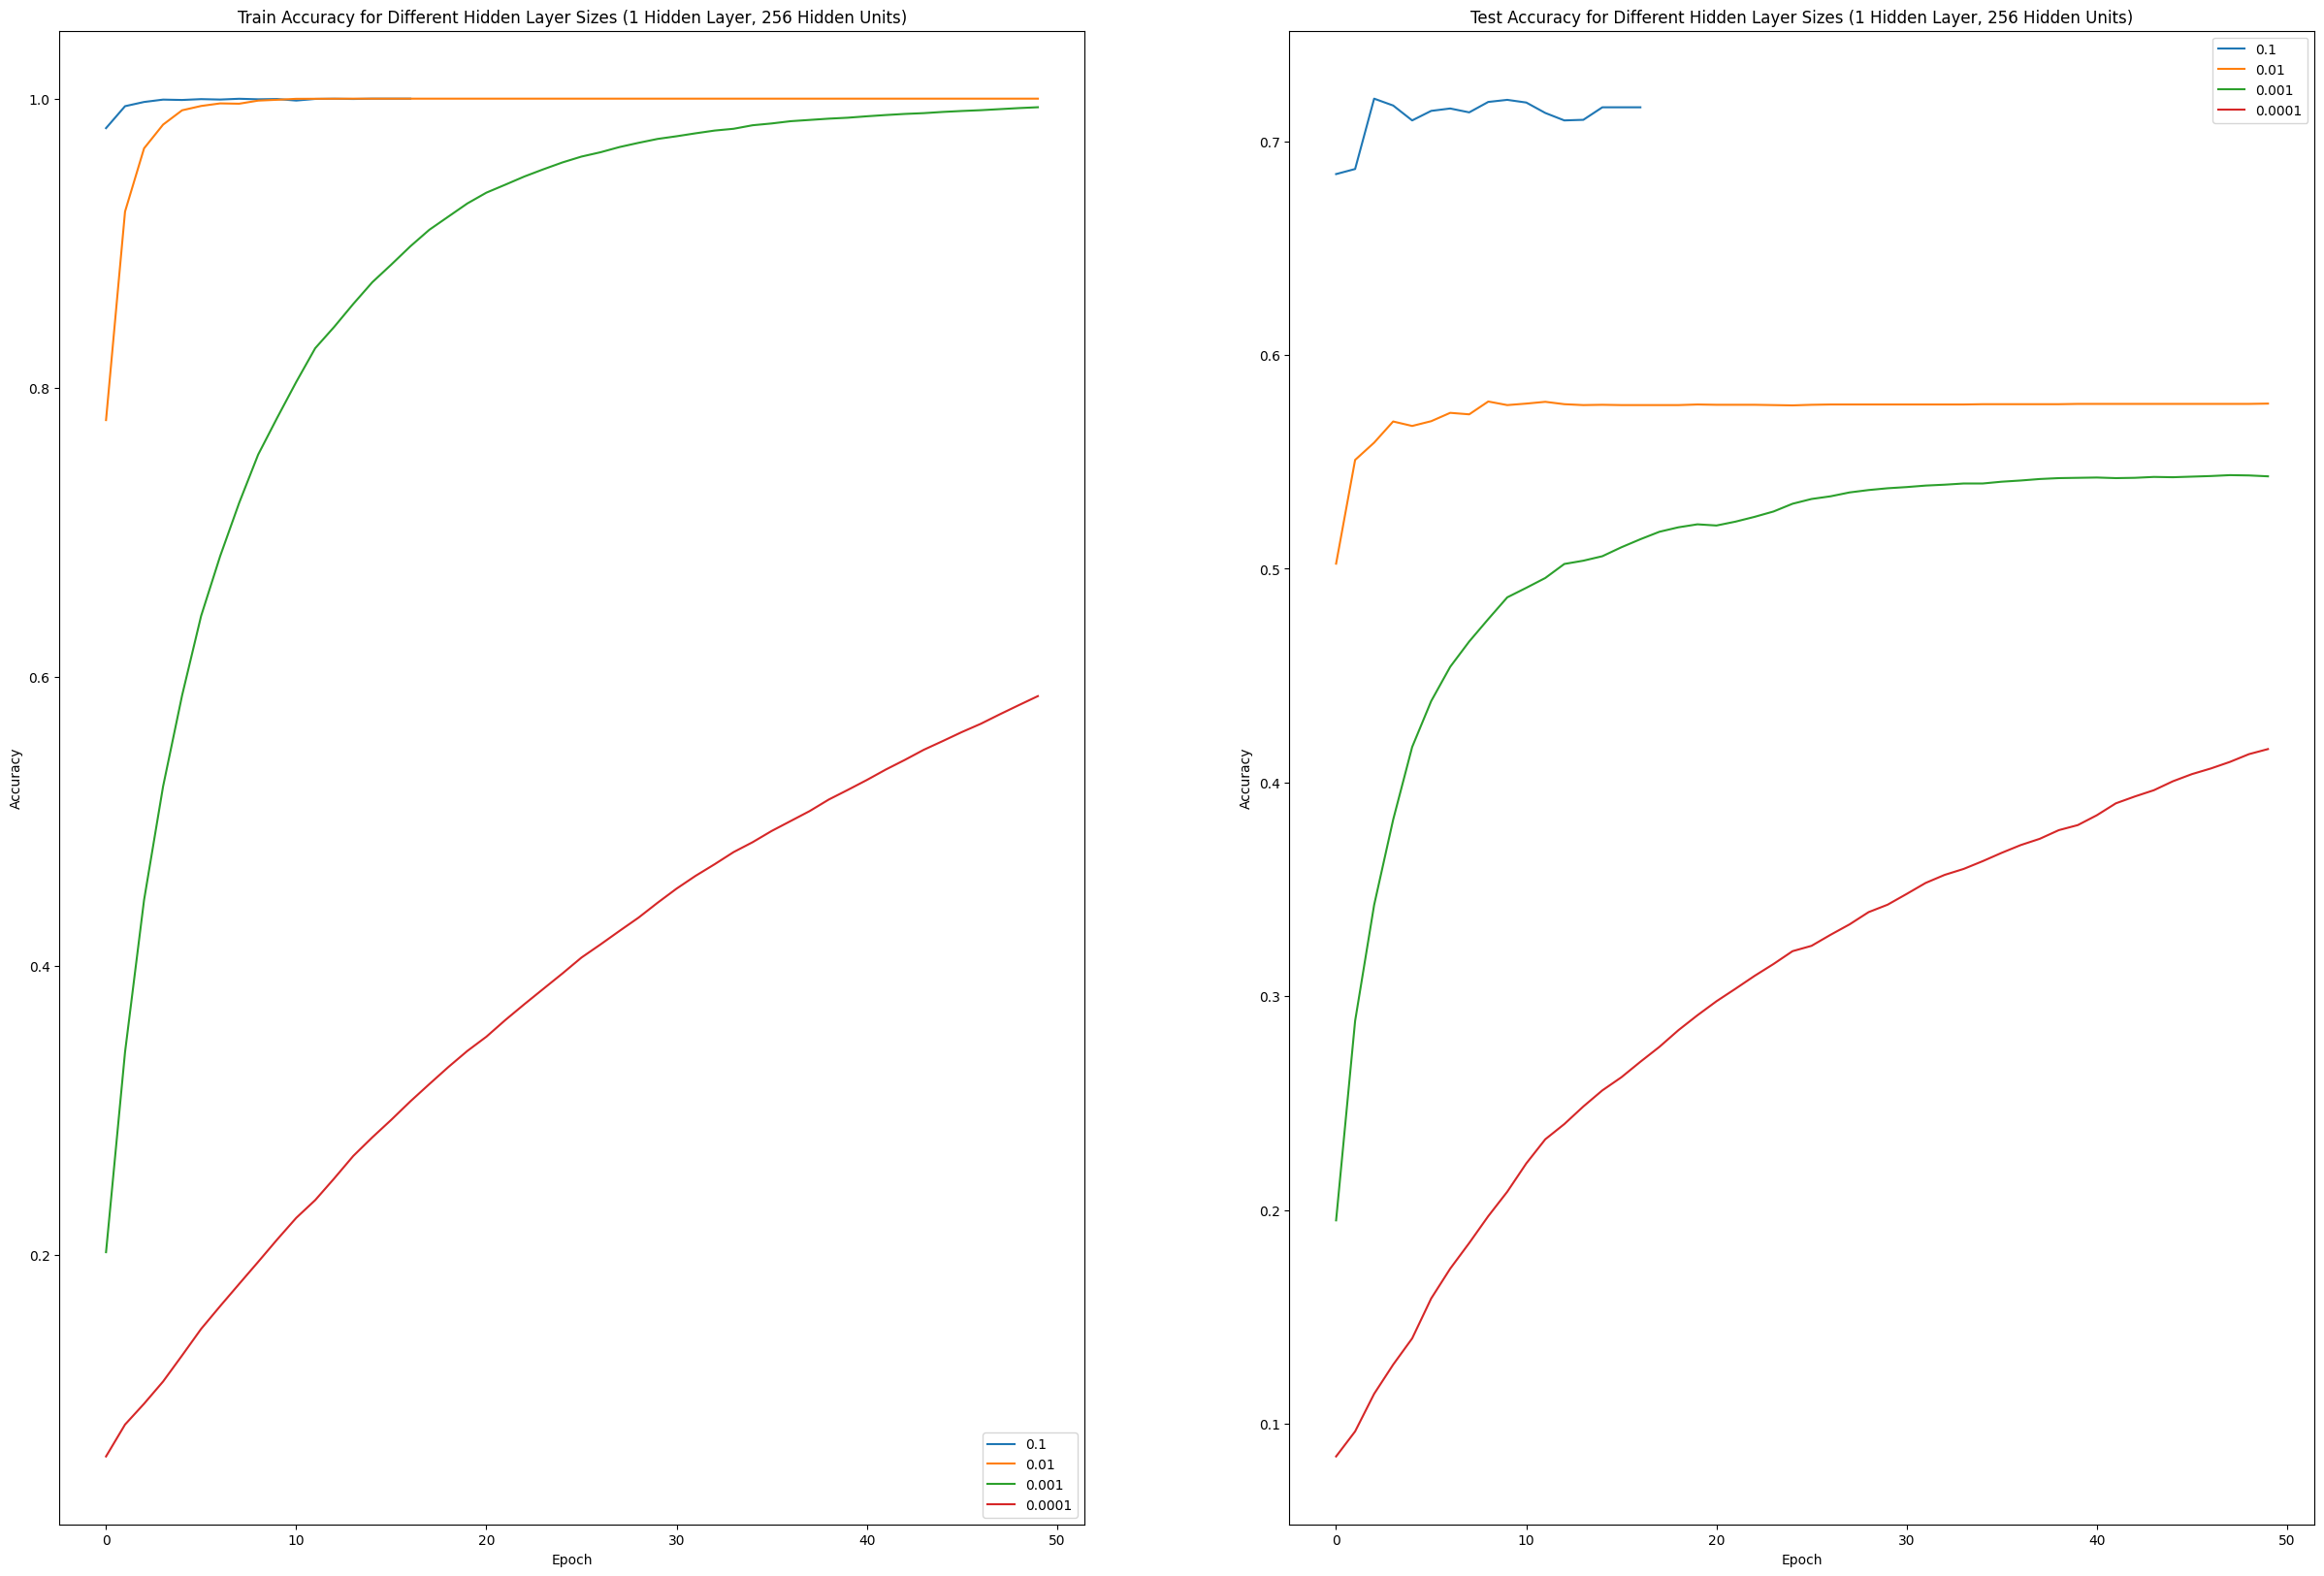

In [26]:
plt.figure(figsize=(30,20))
plt.subplot(121)
for accuracies in train_accs_1_256:
    plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train Accuracy for Different Hidden Layer Sizes (1 Hidden Layer, 256 Hidden Units)')
plt.legend(learning_rates)
plt.subplot(122)
for accuracies in test_accs_1_256:
    plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy for Different Hidden Layer Sizes (1 Hidden Layer, 256 Hidden Units)')
plt.legend(learning_rates)
plt.show()

Learning rate: 0.1


/tmp/ipykernel_8052/3674766548.py:13: RuntimeWarning: overflow encountered in matmul
  return (self.w[None, :, :] @ x[:, :, None]).squeeze() + self.b
/tmp/ipykernel_8052/1088783949.py:7: RuntimeWarning: overflow encountered in subtract
  exps = np.exp(x - np.max(x, axis=-1)[:, None])
/tmp/ipykernel_8052/1088783949.py:7: RuntimeWarning: invalid value encountered in subtract
  exps = np.exp(x - np.max(x, axis=-1)[:, None])


Iteration 0, Loss: nan
Iteration 5, Loss: nan
Learning rate: 0.01
Iteration 0, Loss: 197.34486079693448
Iteration 5, Loss: 1.0273106972929358
Learning rate: 0.001
Iteration 0, Loss: 524.3677909757581
Iteration 5, Loss: 4.835753726169754
Learning rate: 0.0001
Iteration 0, Loss: 1104.2263058193055
Iteration 5, Loss: 346.9673811170978


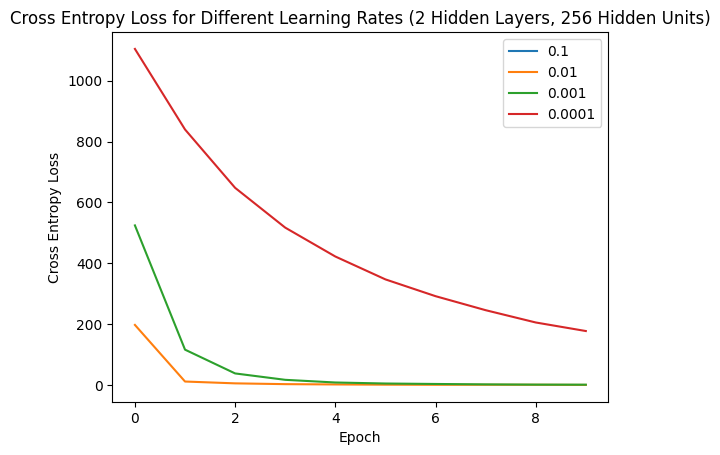

In [23]:
test_accs_2_256 = []
train_accs_2_256 = []

for lr in learning_rates:
    print(f"Learning rate: {lr}")
    mlp2_256 = MLP(2, 256)
    losses = mlp2_256.fit(x_train, y_train, lr, 10, x_test=x_test, y_test=y_test, verbose=True)
    plt.plot(losses, label=lr)
    test_accs_2_256.append(mlp2_256.test_acc)
    train_accs_2_256.append(mlp2_256.train_acc)

plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.title('Cross Entropy Loss for Different Learning Rates (2 Hidden Layers, 256 Hidden Units)')
plt.legend()
plt.show()

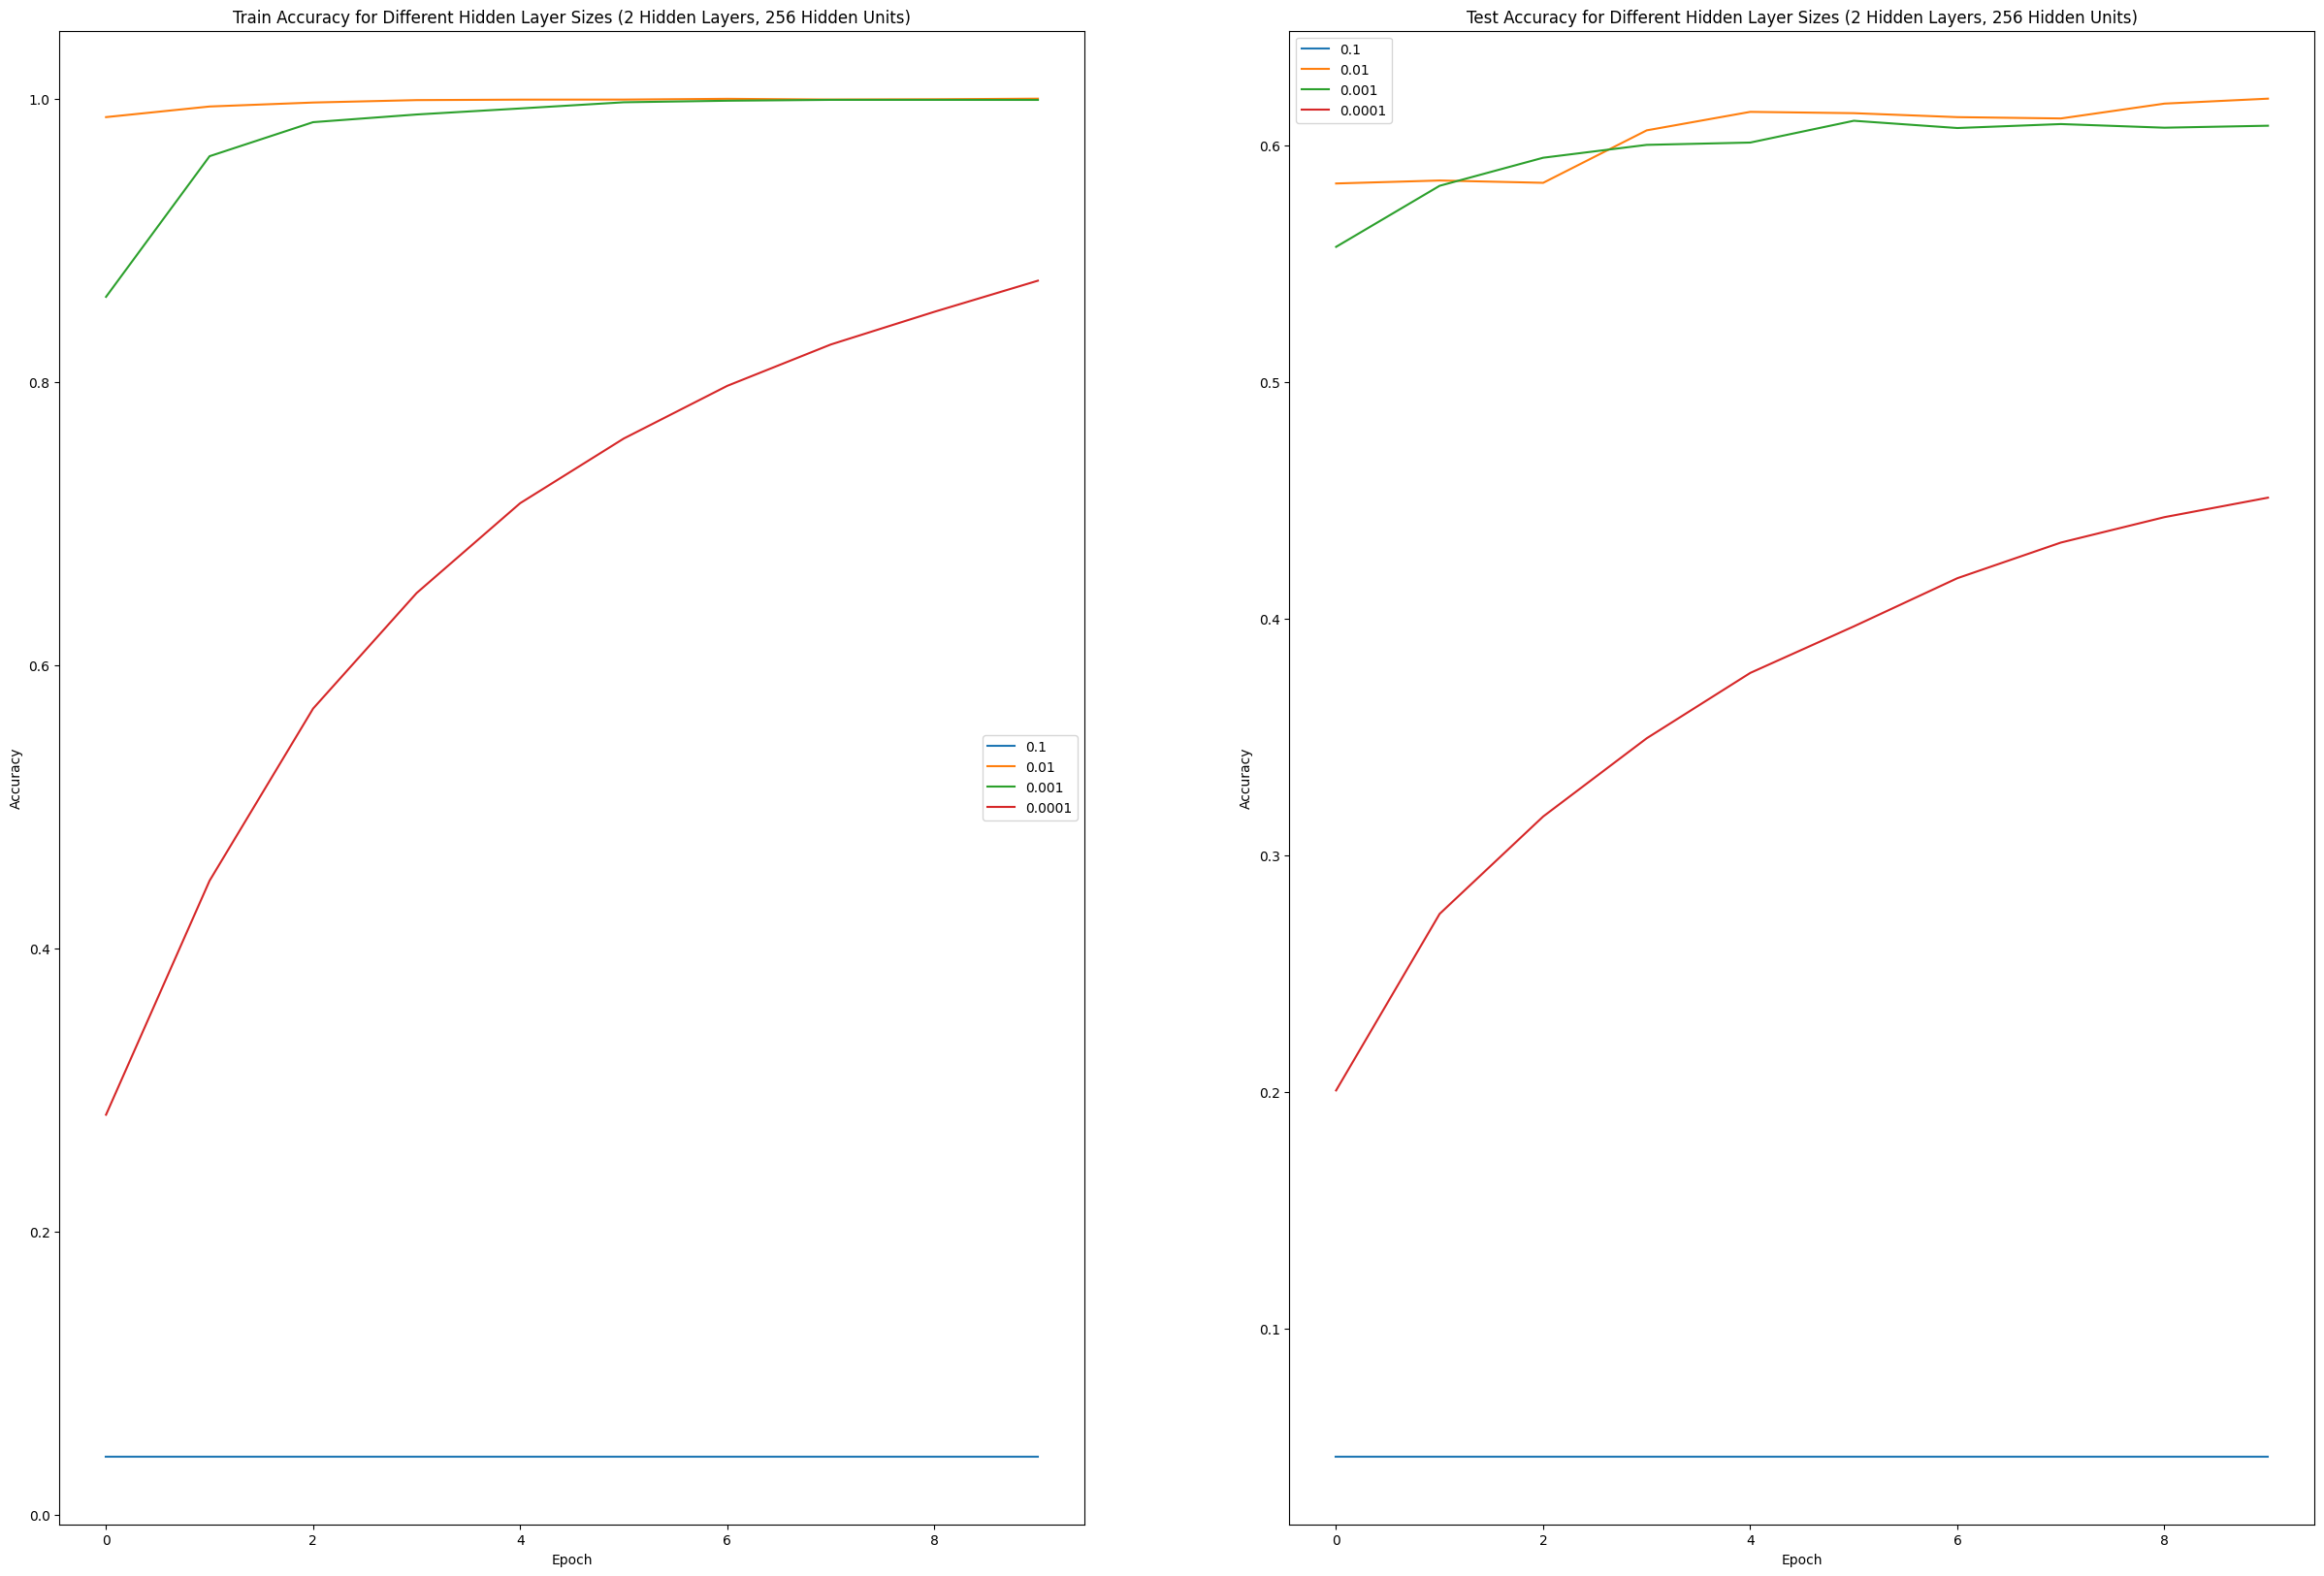

In [27]:
plt.figure(figsize=(30,20))
plt.subplot(121)
for accuracies in train_accs_2_256:
    plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train Accuracy for Different Hidden Layer Sizes (2 Hidden Layers, 256 Hidden Units)')
plt.legend(learning_rates)
plt.subplot(122)
for accuracies in test_accs_2_256:
    plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy for Different Hidden Layer Sizes (2 Hidden Layers, 256 Hidden Units)')
plt.legend(learning_rates)
plt.show()